In [47]:
#!pip install numpy pandas sklearn seaborn scipy 

#Run only when it is needed

In [48]:
from pathlib import Path

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import norm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV ,train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)



## Question no 1 : Data Processing

In [49]:
carsData = pd.read_csv(Path("Cars93.csv"))


#uncomment this when used in google collab
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [50]:
carsData.loc[:,["Model","Type","Max.Price","AirBags"]].head()

,Model,Type,Max.Price,AirBags
0,Integra,Small,18.8,NaN
1,Legend,Midsize,38.7,Driver & Passenger
2,90,Compact,32.3,Driver only
3,100,Midsize,44.6,Driver & Passenger
4,535i,Midsize,36.2,Driver only


### Q.No 1.1: Assign a type to each of the following features (a) Model, (b) Type, (c) Max. Price and (d) Airbags from the following: ordinal/nominal/ratio/interval scale.

Ans:

| Features  | Type    |
|-----------|---------|
| Model     | Nominal |
| Type      | Ordinal |
| Max.Price | Ratio   |
| AirBags   | Ordinal |


### Q1.2 Write a function to handle the missing values in the dataset (e.g., any NA, NaN values).

In [51]:
carsData.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [52]:
carsData.isnull().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags               34
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

We have identified 4 columns which has null values

In [53]:
carsData.loc[:,["Luggage.room","Rear.seat.room","AirBags"]]

,Luggage.room,Rear.seat.room,AirBags
0,11.0,26.5,NaN
1,15.0,30.0,Driver & Passenger
2,14.0,28.0,Driver only
3,17.0,31.0,Driver & Passenger
4,13.0,27.0,Driver only
...,...,...,...
88,NaN,34.0,NaN
89,14.0,31.5,NaN
90,15.0,26.0,NaN
91,14.0,29.5,Driver only


Replacing a nan in airbags with "None" string

In [54]:
carsData['AirBags'] = carsData['AirBags'].fillna('None')

#### We have created a imputed function which is filling na values with mean and for the airbags it is replacing the none with 0, drver only with 1 and driver and passenger to 2

In [55]:
def imputing(carsData):
    luggageMean = carsData["Luggage.room"].mean()
    carsData['Luggage.room'] = carsData['Luggage.room'].replace(luggageMean)

    rearSeatMean = carsData["Rear.seat.room"].mean()
    carsData['Rear.seat.room'] = carsData['Rear.seat.room'].fillna(rearSeatMean)

    return carsData


carsData = imputing(carsData=carsData)

carsData.head(10)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA
5,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,4,2.2,110,5200,2565,No,16.4,6,189,105,69,41,28.0,16.0,2880,USA
6,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,Front,6,3.8,170,4800,1570,No,18.0,6,200,111,74,42,30.5,17.0,3470,USA
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,Rear,6,5.7,180,4000,1320,No,23.0,6,216,116,78,45,30.5,21.0,4105,USA
8,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,Front,6,3.8,170,4800,1690,No,18.8,5,198,108,73,41,26.5,14.0,3495,USA
9,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,Front,8,4.9,200,4100,1510,No,18.0,6,206,114,73,43,35.0,18.0,3620,USA


### Q1.3 Write a function to reduce noise (any error in the feature) in individual attributes.

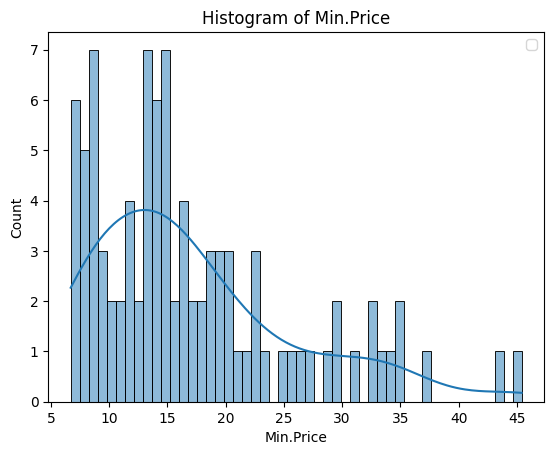

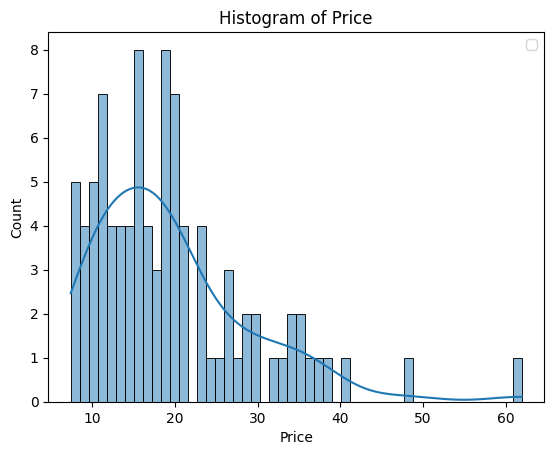

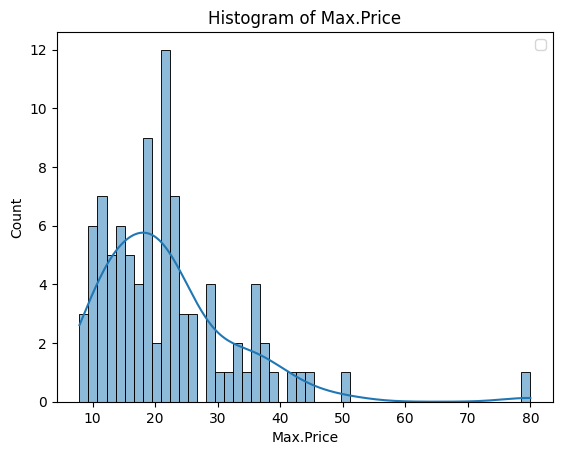

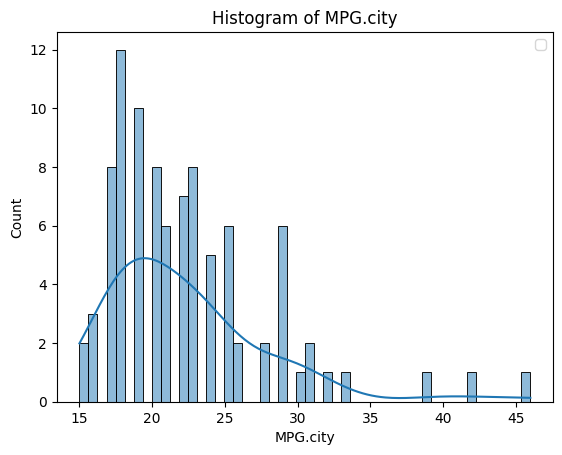

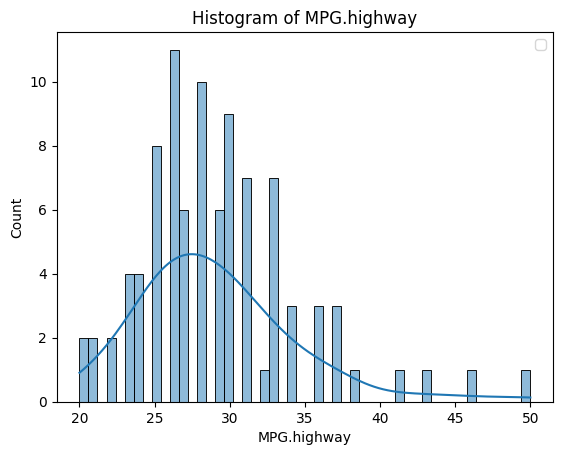

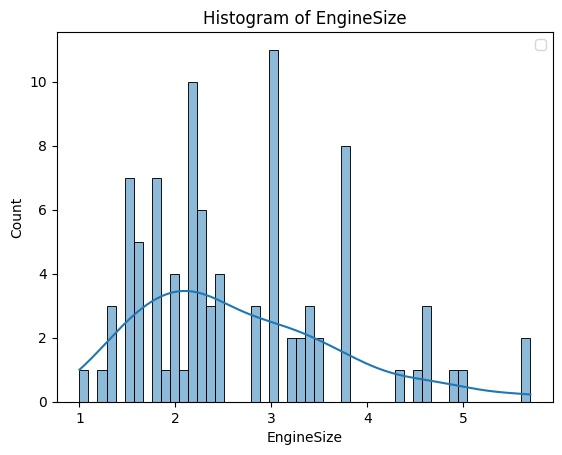

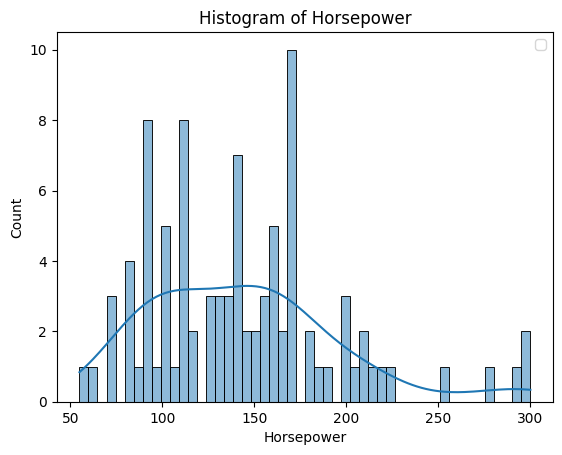

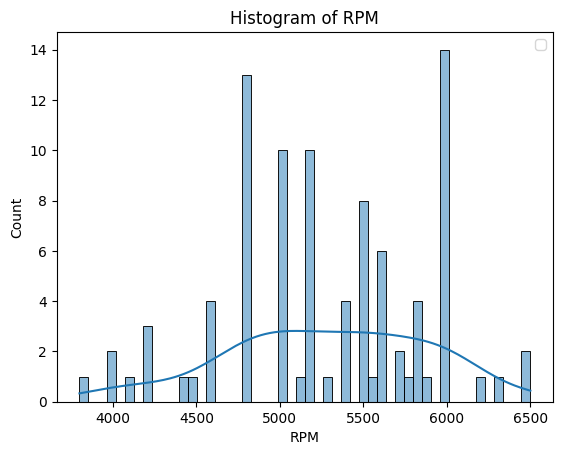

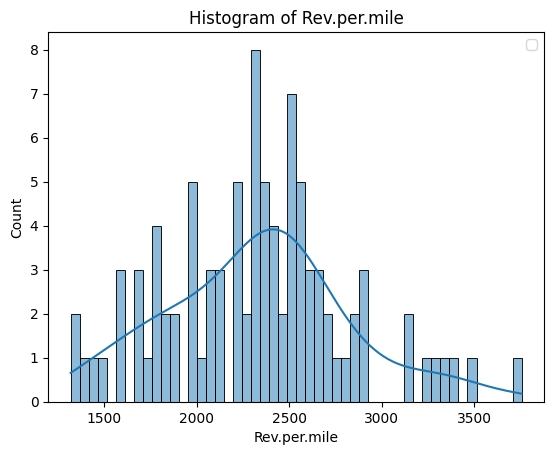

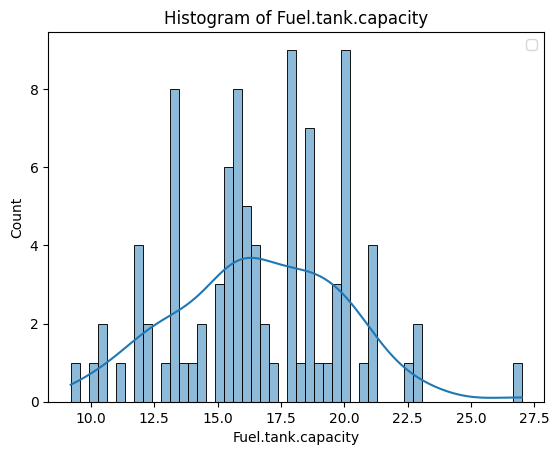

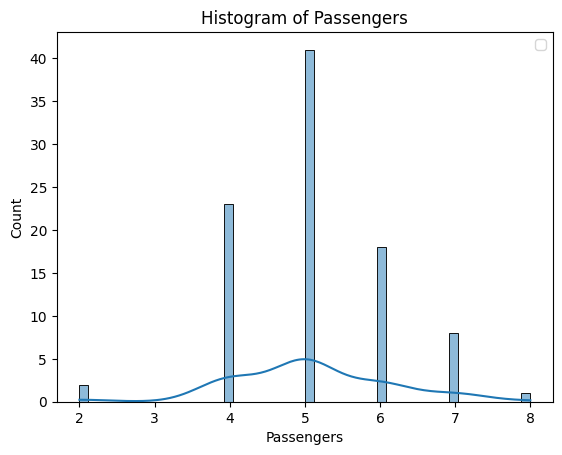

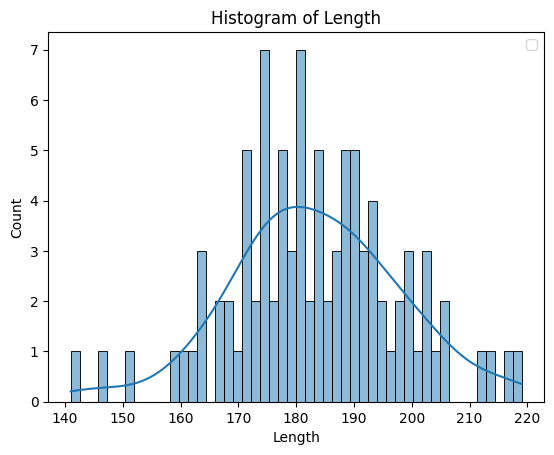

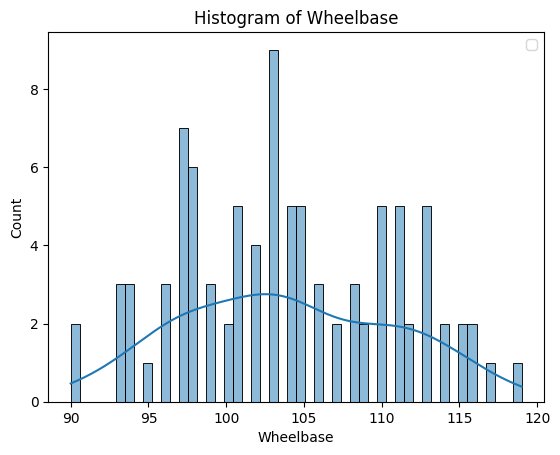

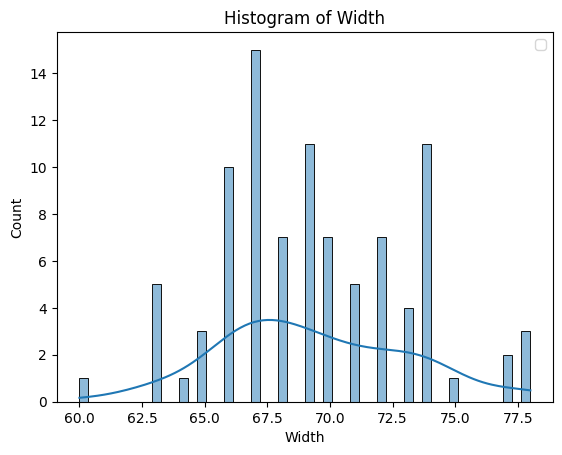

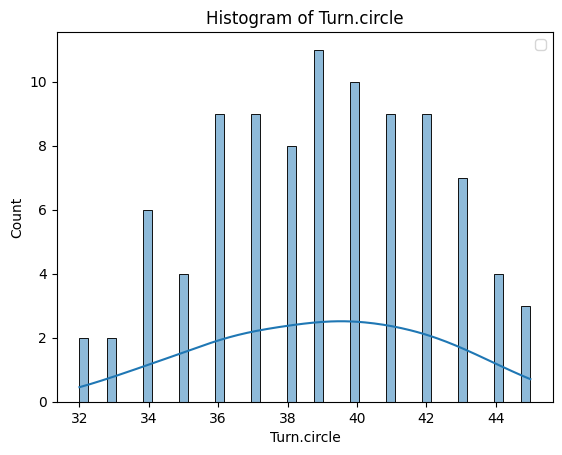

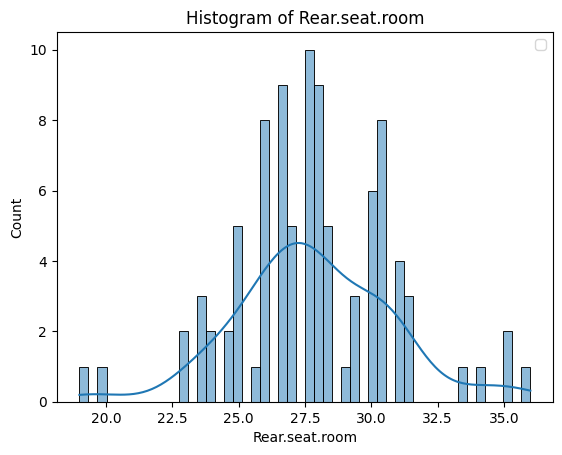

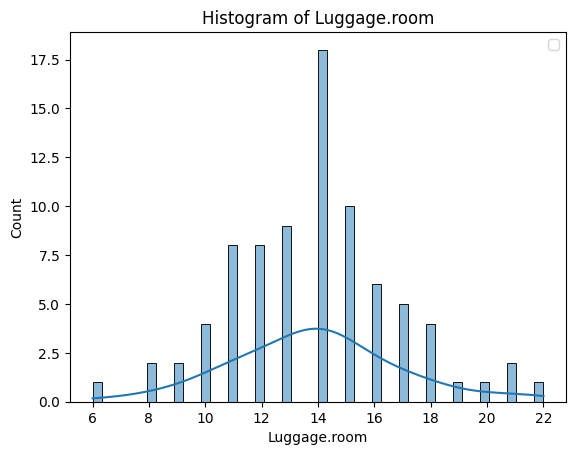

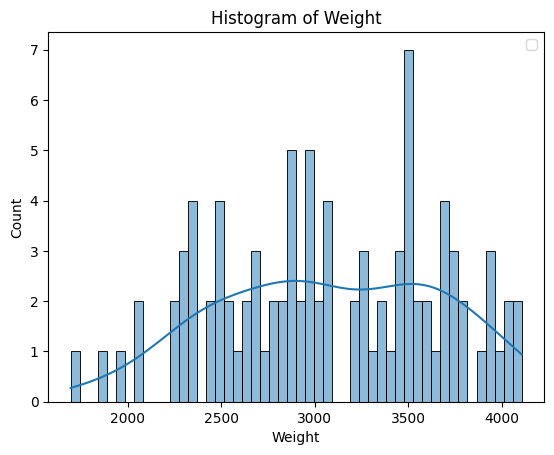

In [56]:
def visualDFdata(data):
    columns = data.select_dtypes(include=['int64','float64'])
    for column in columns:
        sns.histplot(data[column],bins=50,kde=True)
        plt.title(f"Histogram of {column}")
        plt.legend()
        plt.show()

visualDFdata(data=carsData)
    

##### We are going to create removeNoise function which will calculate the upper quantile and lowerquantile and get the lower and upper bound and later clip the data

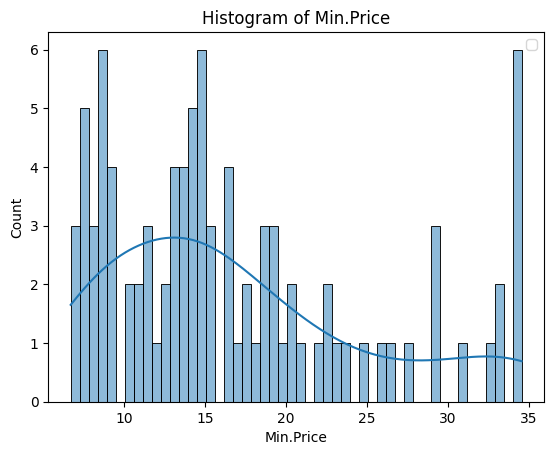

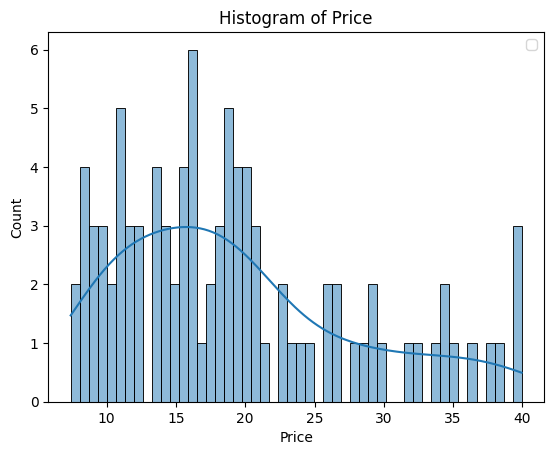

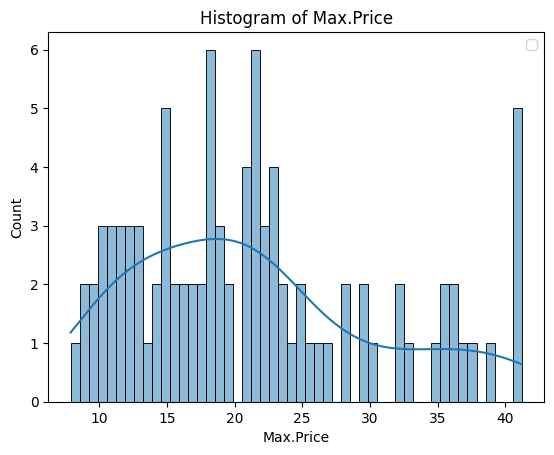

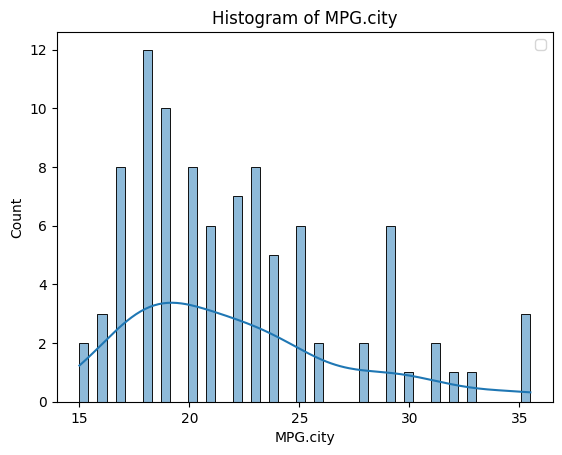

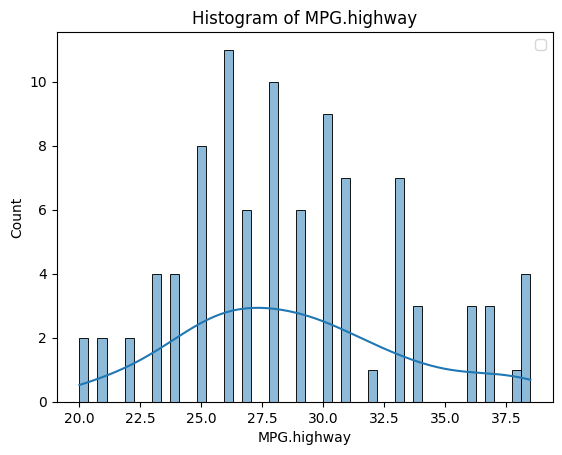

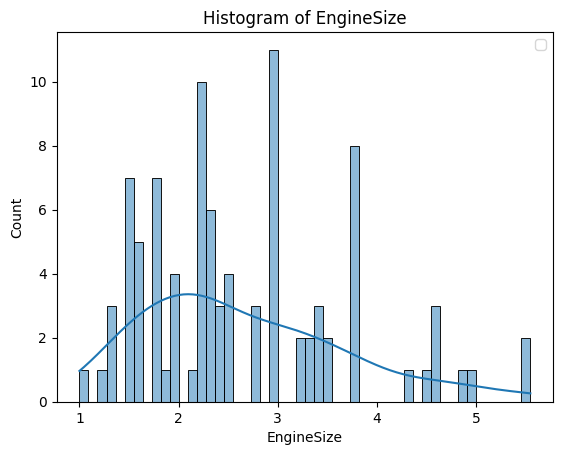

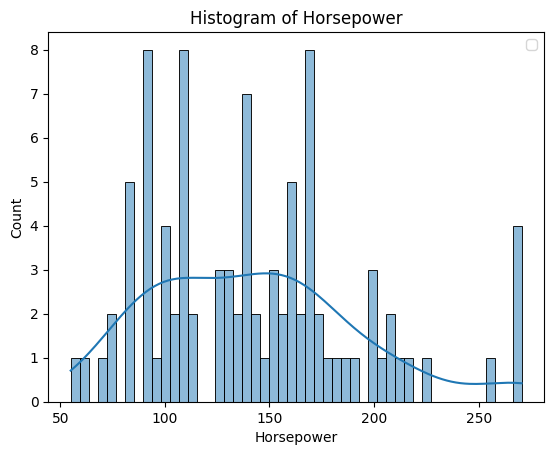

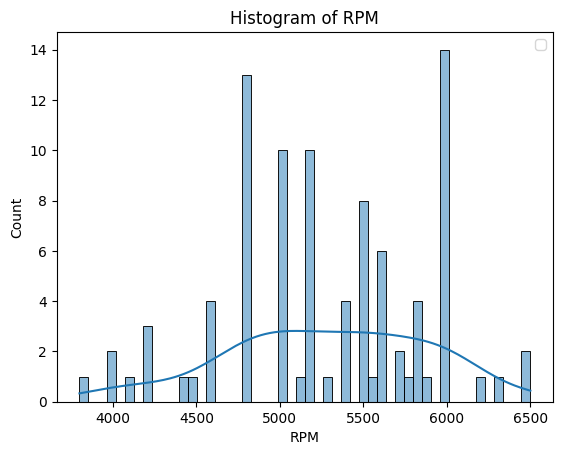

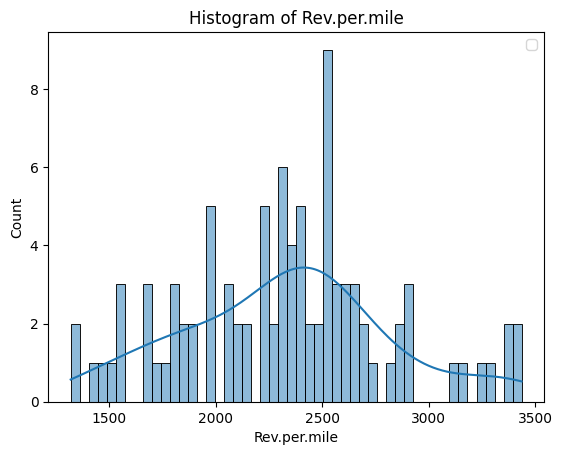

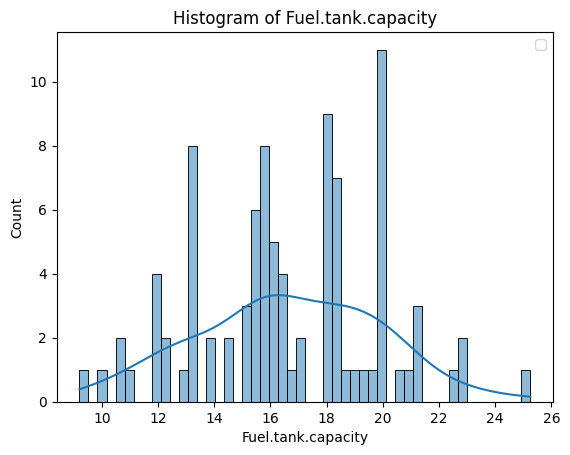

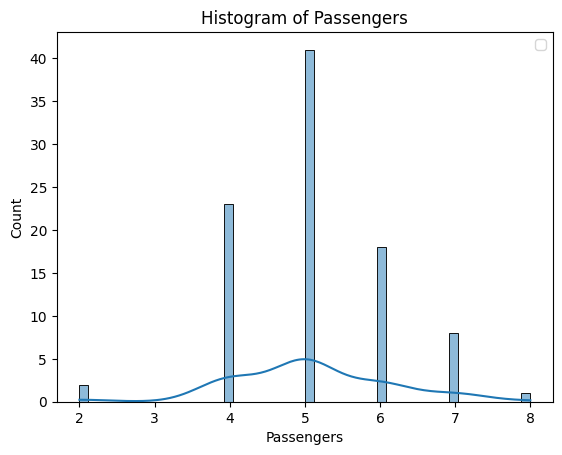

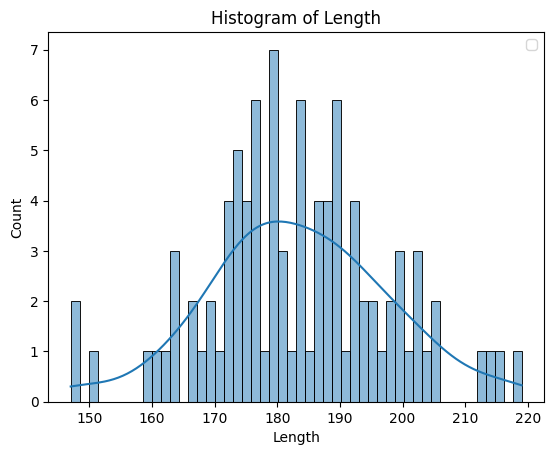

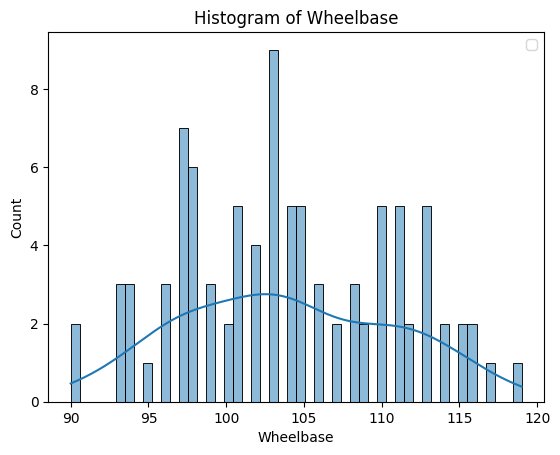

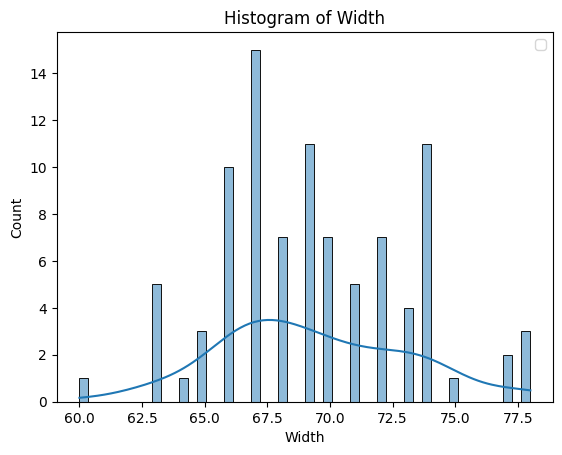

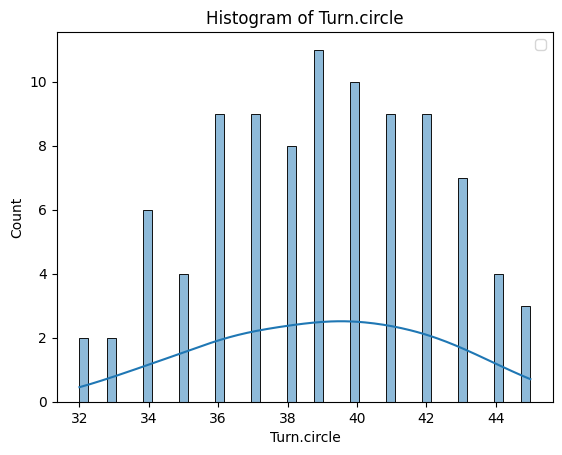

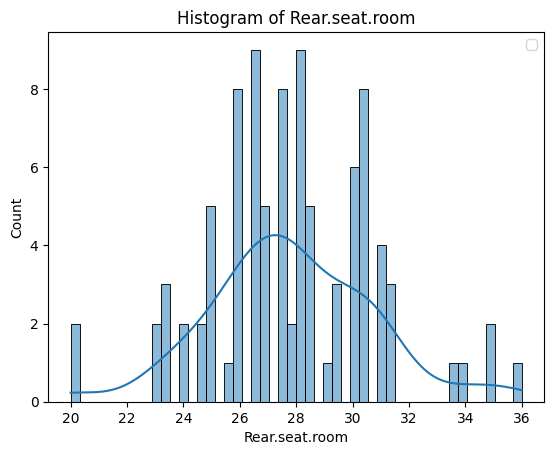

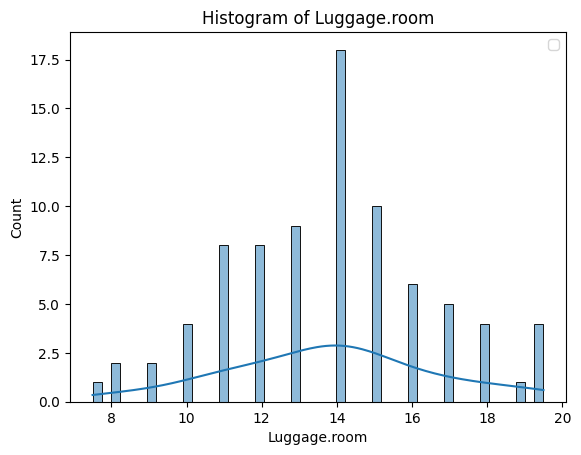

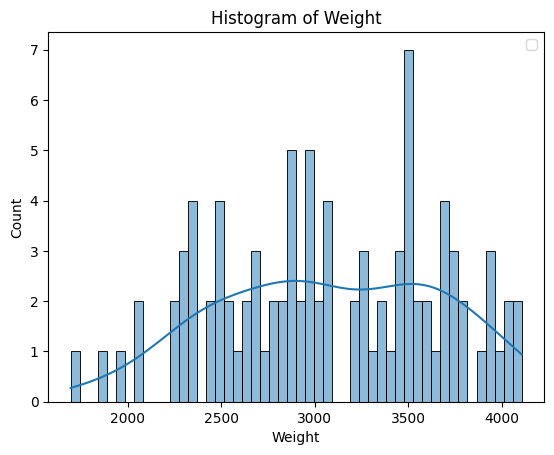

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,82.000000,93.000000
mean,16.875806,19.186559,21.326882,22.145161,28.806452,2.664516,142.849462,5280.645161,2328.010753,16.645699,5.086022,183.279570,103.946237,69.376344,38.956989,27.840423,13.835366,3072.903226
std,8.081990,8.597788,9.032359,4.887640,4.548669,1.028020,49.653461,596.731690,485.782728,3.223973,1.038979,14.398343,6.819674,3.778986,3.223265,2.925599,2.784497,589.896510
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,147.000000,90.000000,60.000000,32.000000,20.000000,7.500000,1695.000000
25%,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,34.550000,39.950000,41.200000,35.500000,38.500000,5.550000,270.500000,6500.000000,3435.000000,25.250000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,19.500000,4105.000000


In [57]:
def removeNoise(carsData):
    columns = carsData.select_dtypes(include=['int64', 'float64']).columns 

    for column in columns:

        Q1 = carsData[column].quantile(0.25)
        Q3 = carsData[column].quantile(0.75)
        IQR = Q3 - Q1

        upperBound = Q3 + 1.5 * IQR
        lowerBound = Q1 - 1.5 * IQR

        carsData[column] = carsData[column].clip(lower=lowerBound, upper=upperBound)



removeNoise(carsData=carsData)

visualDFdata(data=carsData)
carsData.describe()


### Q1.d) Write a function to encode all the categorical features in the dataset according to the type of variable jointly.

In [58]:

categoricalColumn = carsData.select_dtypes(exclude=['int64','float64']).columns
carsData.loc[:,categoricalColumn]

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin
0,Acura,Integra,Small,None,Front,4,Yes,non-USA
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA
...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,None,Front,5,Yes,non-USA
89,Volkswagen,Passat,Compact,None,Front,4,Yes,non-USA
90,Volkswagen,Corrado,Sporty,None,Front,6,Yes,non-USA
91,Volvo,240,Compact,Driver only,Rear,4,Yes,non-USA



We are going to use OneHotEncoding for Manufacturer, Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin

In [59]:
def oneHotEncoding(data,columns):
    onehotEncoded = pd.get_dummies(data=data,columns=columns,prefix=columns)
    return onehotEncoded
    
carsData = oneHotEncoding(data=carsData,columns=categoricalColumn)
carsData

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Manufacturer_Acura,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrylser,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Eagle,Manufacturer_Ford,Manufacturer_Geo,Manufacturer_Honda,Manufacturer_Hyundai,Manufacturer_Infiniti,Manufacturer_Lexus,Manufacturer_Lincoln,Manufacturer_Mazda,Manufacturer_Mercedes-Benz,Manufacturer_Mercury,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Suzuki,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Model_100,Model_190E,Model_240,Model_300E,Model_323,Model_535i,Model_626,Model_850,Model_90,Model_900,Model_Accord,Model_Achieva,Model_Aerostar,Model_Altima,Model_Astro,Model_Bonneville,Model_Camaro,Model_Camry,Model_Capri,Model_Caprice,Model_Caravan,Model_Cavalier,Model_Celica,Model_Century,Model_Civic,Model_Colt,Model_Concorde,Model_Continental,Model_Corrado,Model_Corsica,Model_Corvette,Model_Cougar,Model_Crown_Victoria,Model_Cutlass_Ciera,Model_DeVille,Model_Diamante,Model_Dynasty,Model_ES300,Model_Eighty-Eight,Model_Elantra,Model_Escort,Model_Eurovan,Model_Excel,Model_Festiva,Model_Firebird,Model_Fox,Model_Grand_Prix,Model_Imperial,Model_Integra,Model_Justy,Model_Laser,Model_LeBaron,Model_LeMans,Model_LeSabre,Model_Legacy,Model_Legend,Model_Loyale,Model_Lumina,Model_Lumina_APV,Model_MPV,Model_Maxima,Model_Metro,Model_Mirage,Model_Mustang,Model_Passat,Model_Prelude,Model_Previa,Model_Probe,Model_Protege,Model_Q45,Model_Quest,Model_RX-7,Model_Riviera,Model_Roadmaster,Model_SC300,Model_SL,Model_Scoupe,Model_Sentra,Model_Seville,Model_Shadow,Model_Silhouette,Model_Sonata,Model_Spirit,Model_Stealth,Model_Storm,Model_Summit,Model_Sunbird,Model_Swift,Model_Taurus,Model_Tempo,Model_Tercel,Model_Town_Car,Model_Vision,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver & Passenger,AirBags_Driver only,AirBags_None,DriveTrain_4WD,DriveTrain_Front,DriveTrain_Rear,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_No,Man.trans.avail_Yes,Origin_USA,Origin_non-USA
0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,True
1,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

#### Q1.e Write a function to normalize / scale the features either individually or jointly.

['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']


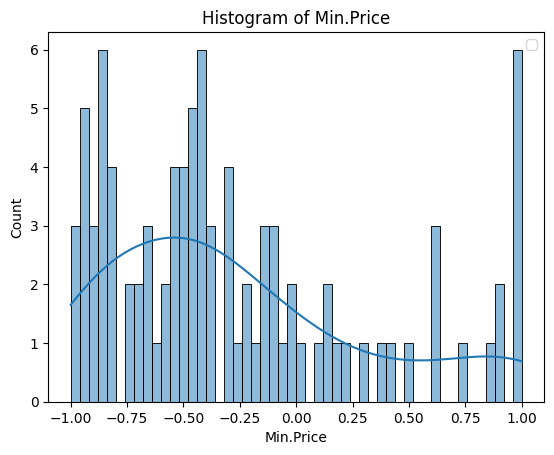

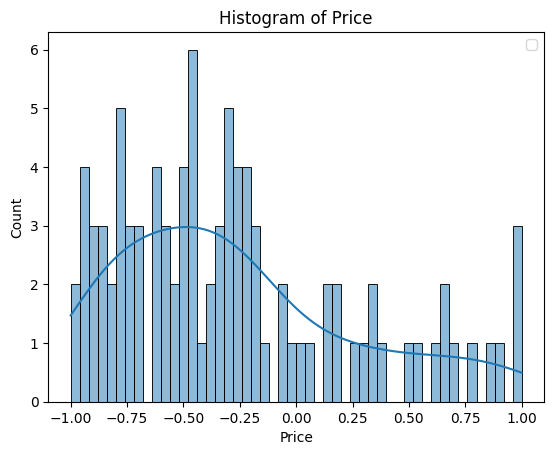

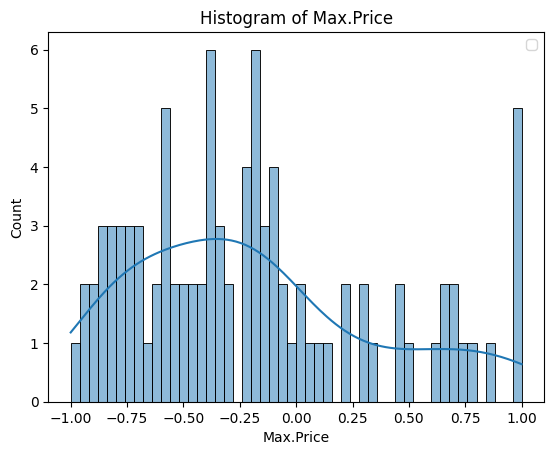

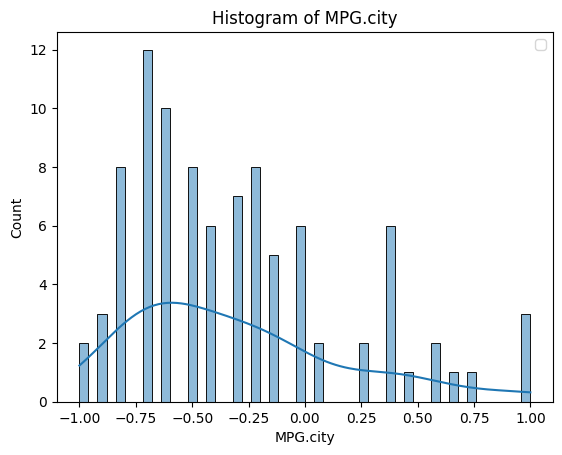

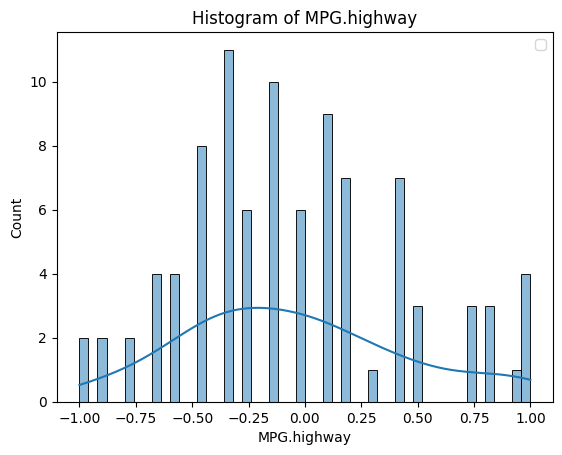

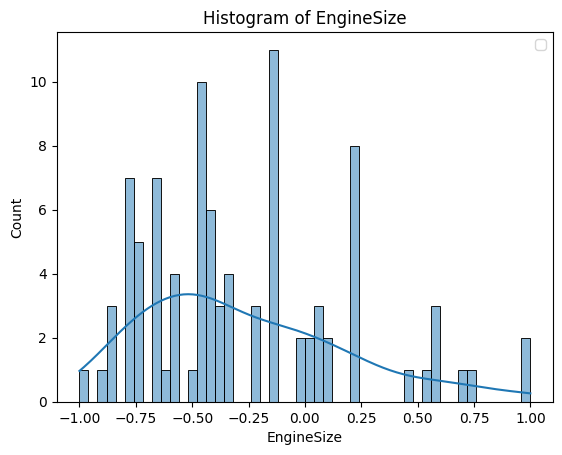

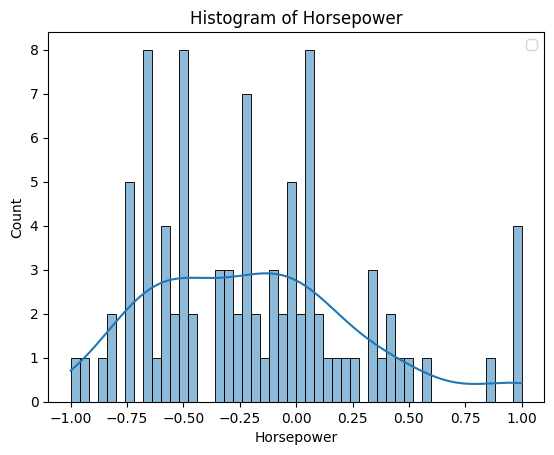

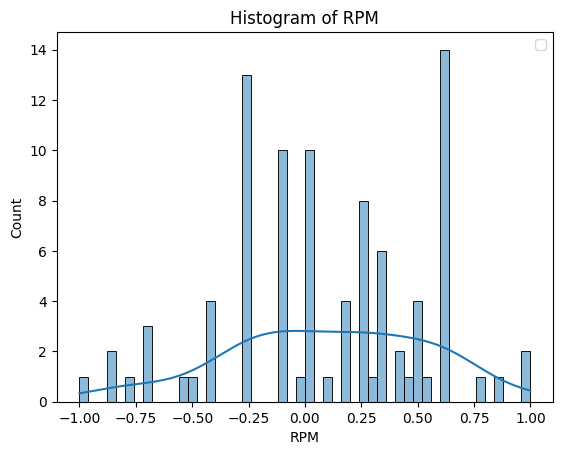

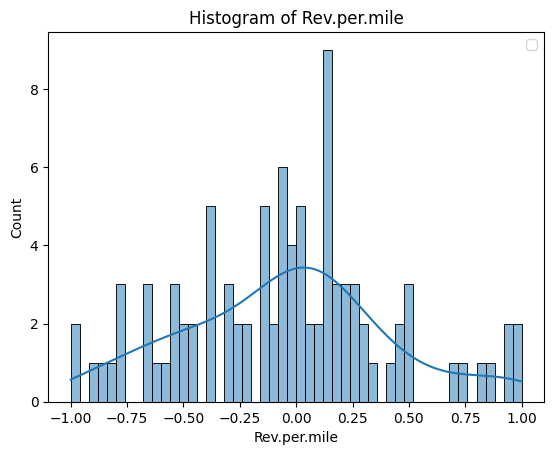

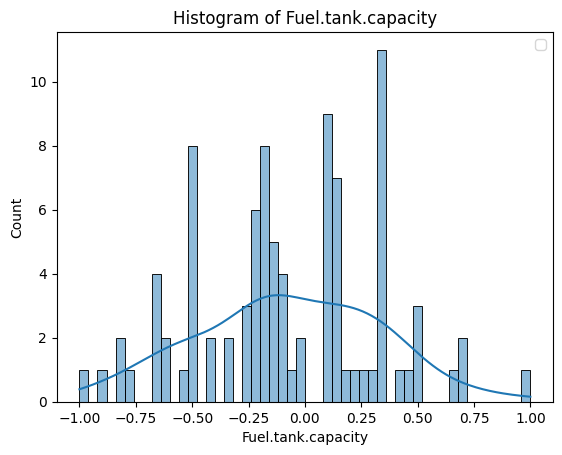

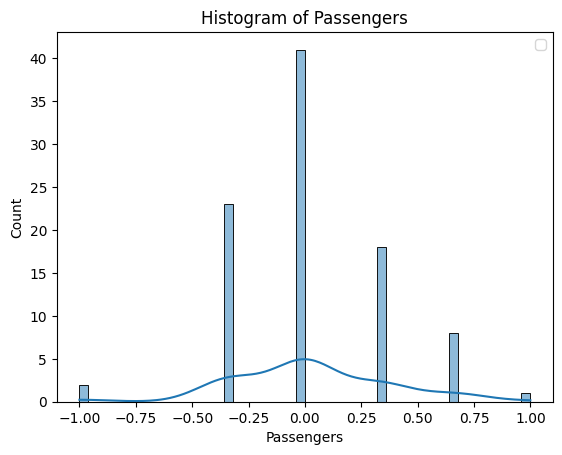

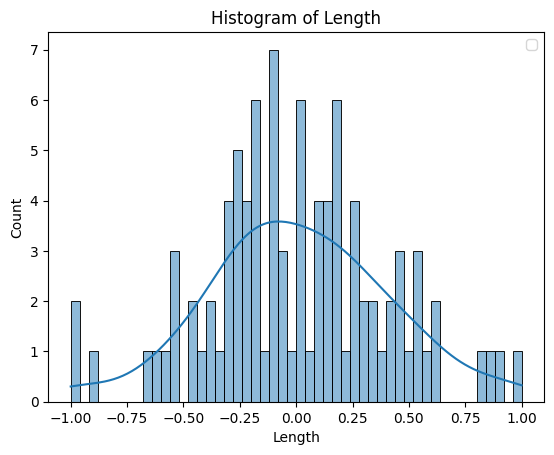

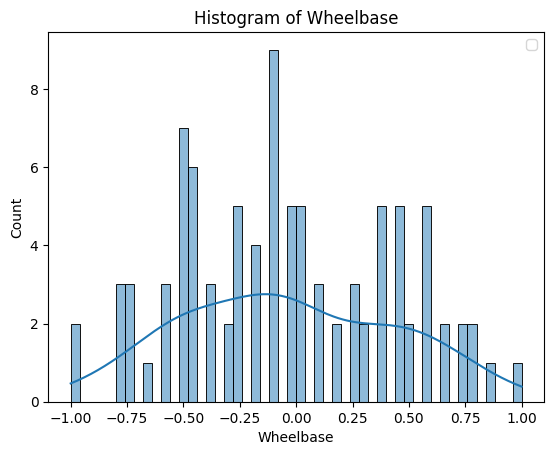

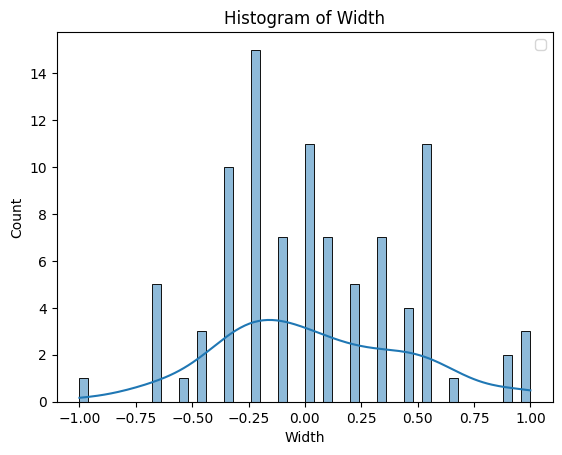

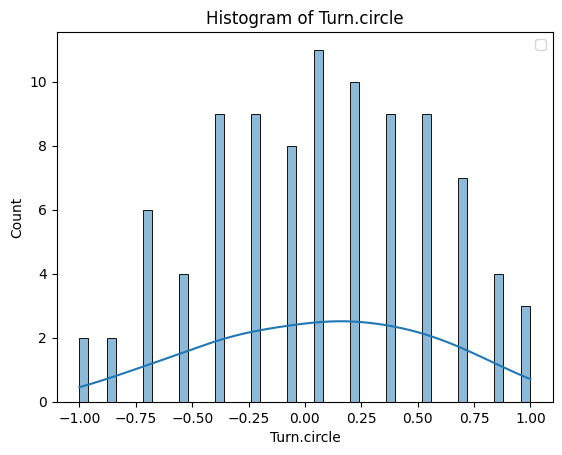

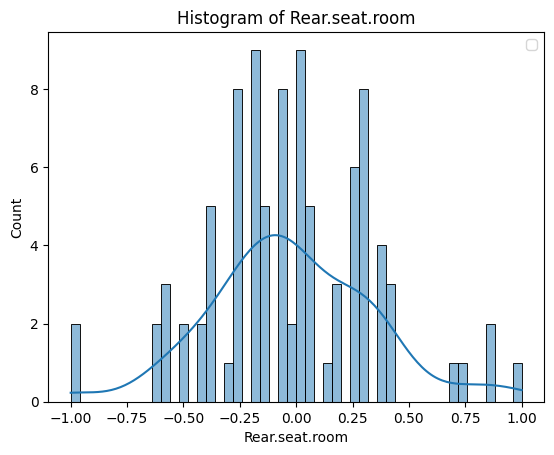

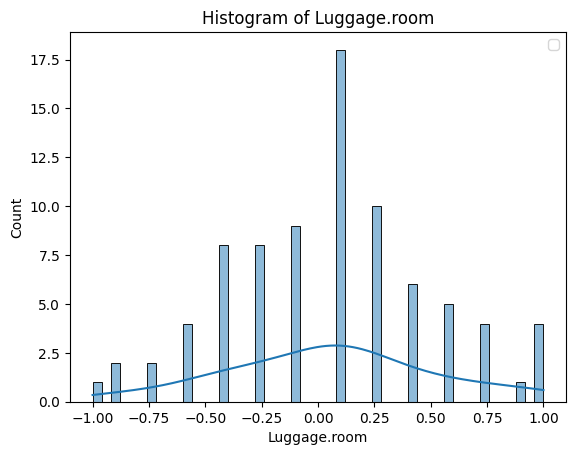

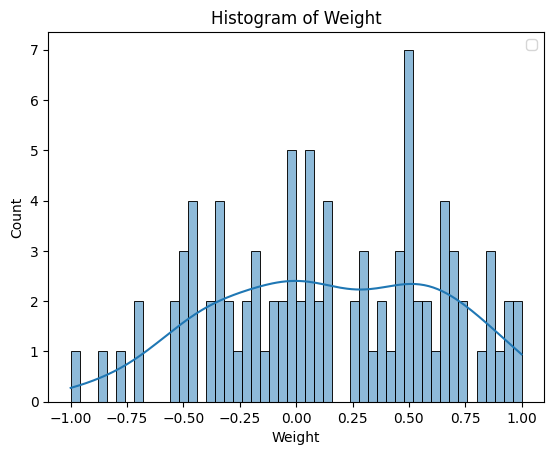

In [60]:
def normalize(data):
    columns = data.select_dtypes(include=['float64','int64']).columns.tolist()
    print(columns)
    scaler = MinMaxScaler(feature_range=(-1,1))
    data[columns] = scaler.fit_transform(data[columns])

    return data

carsData = normalize(data=carsData)
visualDFdata(data=carsData)

### Q1.f Write a function to create a random split of the data into train, validation and test sets in the ratio of [70:20:10].

We are going to create a test split using 7:2:1

In [61]:
def split_train_test_validate_data(data, train_size=0.7, validation_size=0.2, test_size=0.1, random_state=42):
    train_data, temp_data = train_test_split(data, train_size=train_size, random_state=random_state)
    valid_size_adjusted =  validation_size/(1-train_size)
    print(valid_size_adjusted)
    validation_data, test_data = train_test_split(temp_data, train_size=valid_size_adjusted, random_state=random_state)
    return train_data, validation_data, test_data
train, validate , test = split_train_test_validate_data(data=carsData)

print(train)

0.6666666666666666
    Min.Price     Price  Max.Price  MPG.city  MPG.highway  EngineSize  \
31  -0.877917 -0.834101  -0.759760 -0.219512     0.081081   -0.648352   
77  -0.023339  0.308756   0.753754 -0.512195    -0.351351   -0.516484   
9    0.888689  0.677419   0.705706 -0.902439    -0.459459    0.714286   
70  -0.080790 -0.182796  -0.159159 -0.609756    -0.135135    0.230769   
5   -0.461400 -0.490015  -0.435435 -0.317073     0.189189   -0.472527   
..        ...       ...        ...       ...          ...         ...   
20  -0.439856 -0.483871  -0.447447 -0.219512    -0.135135   -0.120879   
60  -0.411131 -0.539171  -0.579580 -0.609756    -0.351351    0.230769   
71  -0.662478 -0.569892  -0.429429 -0.219512     0.081081   -0.648352   
14  -0.518851 -0.477727  -0.369369 -0.414634    -0.027027   -0.472527   
51   0.989228  0.763441   0.795796 -0.707317    -0.351351    0.582418   

    Horsepower       RPM  Rev.per.mile  Fuel.tank.capacity  Passengers  \
31   -0.331787  1.000000      

# Question 2 -  Implement the linear regression model to predict the dependency between two variables.
## 1. Implement linear regression using the inbuilt function “LinearRegression” model in sklearn

Loading dataset

In [62]:
lr_df = pd.read_csv("linear_regression_dataset.csv")

Data inspection and preprocessing 

In [63]:
lr_df.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [64]:
lr_df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [65]:
lr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Height   15 non-null     float64
 1   Weight   15 non-null     float64
dtypes: float64(2)
memory usage: 372.0 bytes


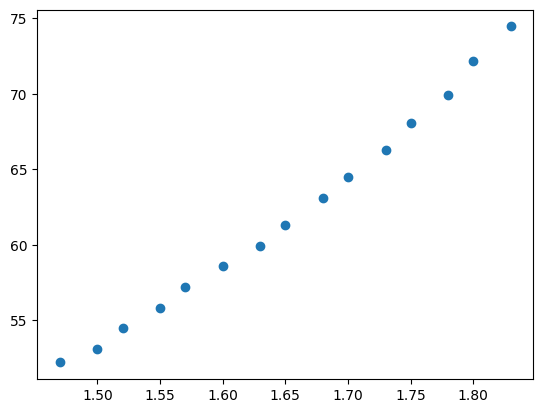

In [66]:
x_height = lr_df.iloc[:,:-1].values
y_weight = lr_df.iloc[:,1].values
plt.scatter(x=x_height,y=y_weight)

In [67]:
x_train_lr , x_test_lr , y_train_lr , y_test_lr = train_test_split(x_height ,y_weight ,test_size=0.2 ,random_state=0)

In [68]:
x_train_lr.shape

(12, 1)

In [69]:
model_lr = LinearRegression()
model_lr.fit(x_train_lr,y_train_lr)

LinearRegression()

In [70]:
weight_predict = model_lr.predict(x_test_lr)

In [71]:
error = weight_predict - y_test_lr
error

array([-0.18945868,  0.99010826,  0.88301863])

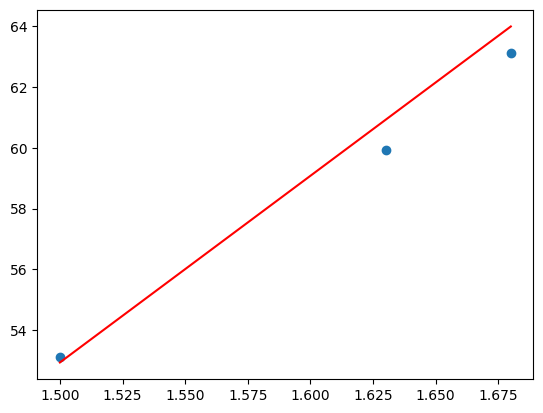

In [72]:
plt.scatter(x_test_lr,y_test_lr)
plt.plot(x_test_lr,weight_predict, color='red')

Model cofficient 

In [73]:
model_lr.coef_

array([61.45820729])

In [74]:
model_lr.intercept_

-39.25676962267158

Linear regression without the use of any inbuilt function.

In [75]:
class Linear_Regression(): 

	# Initiating the parameters. 
	def __init__(self, learning_rate, no_of_itr): 
		self.learning_rate = learning_rate 
		self.no_of_itr = no_of_itr 

	def fit(self, X, Y): 
		self.m, self.n = X.shape	 
		self.w = np.zeros((self.n, 1)) 
		self.b = 0
		self.X = X 
		self.Y = Y 

		for i in range(self.no_of_itr): 
			self.update_weigths() 

	def update_weigths(self): 
		Y_prediction = self.predict(self.X) 

		# Calculating gradients 
		dw = -(self.X.T).dot(self.Y - Y_prediction)/self.m 

		db = -np.sum(self.Y - Y_prediction)/self.m 

		# Updating weights 
		self.w = self.w - self.learning_rate * dw 
		self.b = self.b - self.learning_rate * db 

	def predict(self, X): 
		return X.dot(self.w) + self.b 

	def print_weights(self): 
		print('Weights for the respective features are :') 
		print(self.w) 
		print() 

		print('Bias value for the regression is ', self.b) 


In [76]:

model_custom = Linear_Regression(learning_rate=0.03, 
                          no_of_itr=2000) 
model_custom.fit(x_train_lr, y_train_lr) 

In [77]:
model_custom.predict(x_test_lr)

array([[63.69759484, 72.66865615, 57.16910478, 54.72653353, 70.63018677,
        65.32298233, 60.84194169, 66.95734986, 55.94781916, 52.68806415,
        58.39937045, 68.59171738],
       [64.305249  , 74.05380229, 57.21095646, 54.55669571, 71.83866555,
        66.0715034 , 61.20210591, 67.84751611, 55.88382609, 52.34155897,
        58.54784515, 69.62352882],
       [64.53896213, 74.5865508 , 57.22705326, 54.49137347, 72.30346509,
        66.35939612, 61.34063061, 68.18988775, 55.85921337, 52.20828775,
        58.60495081, 70.02037938]])

# Q2b: Logistic Regression 

In [78]:
df_logistic = pd.read_csv("logistic_regression_dataset.csv")

In [79]:
df_logistic.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [80]:
df_logistic.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [81]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [82]:
df_logistic.columns.tolist()

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

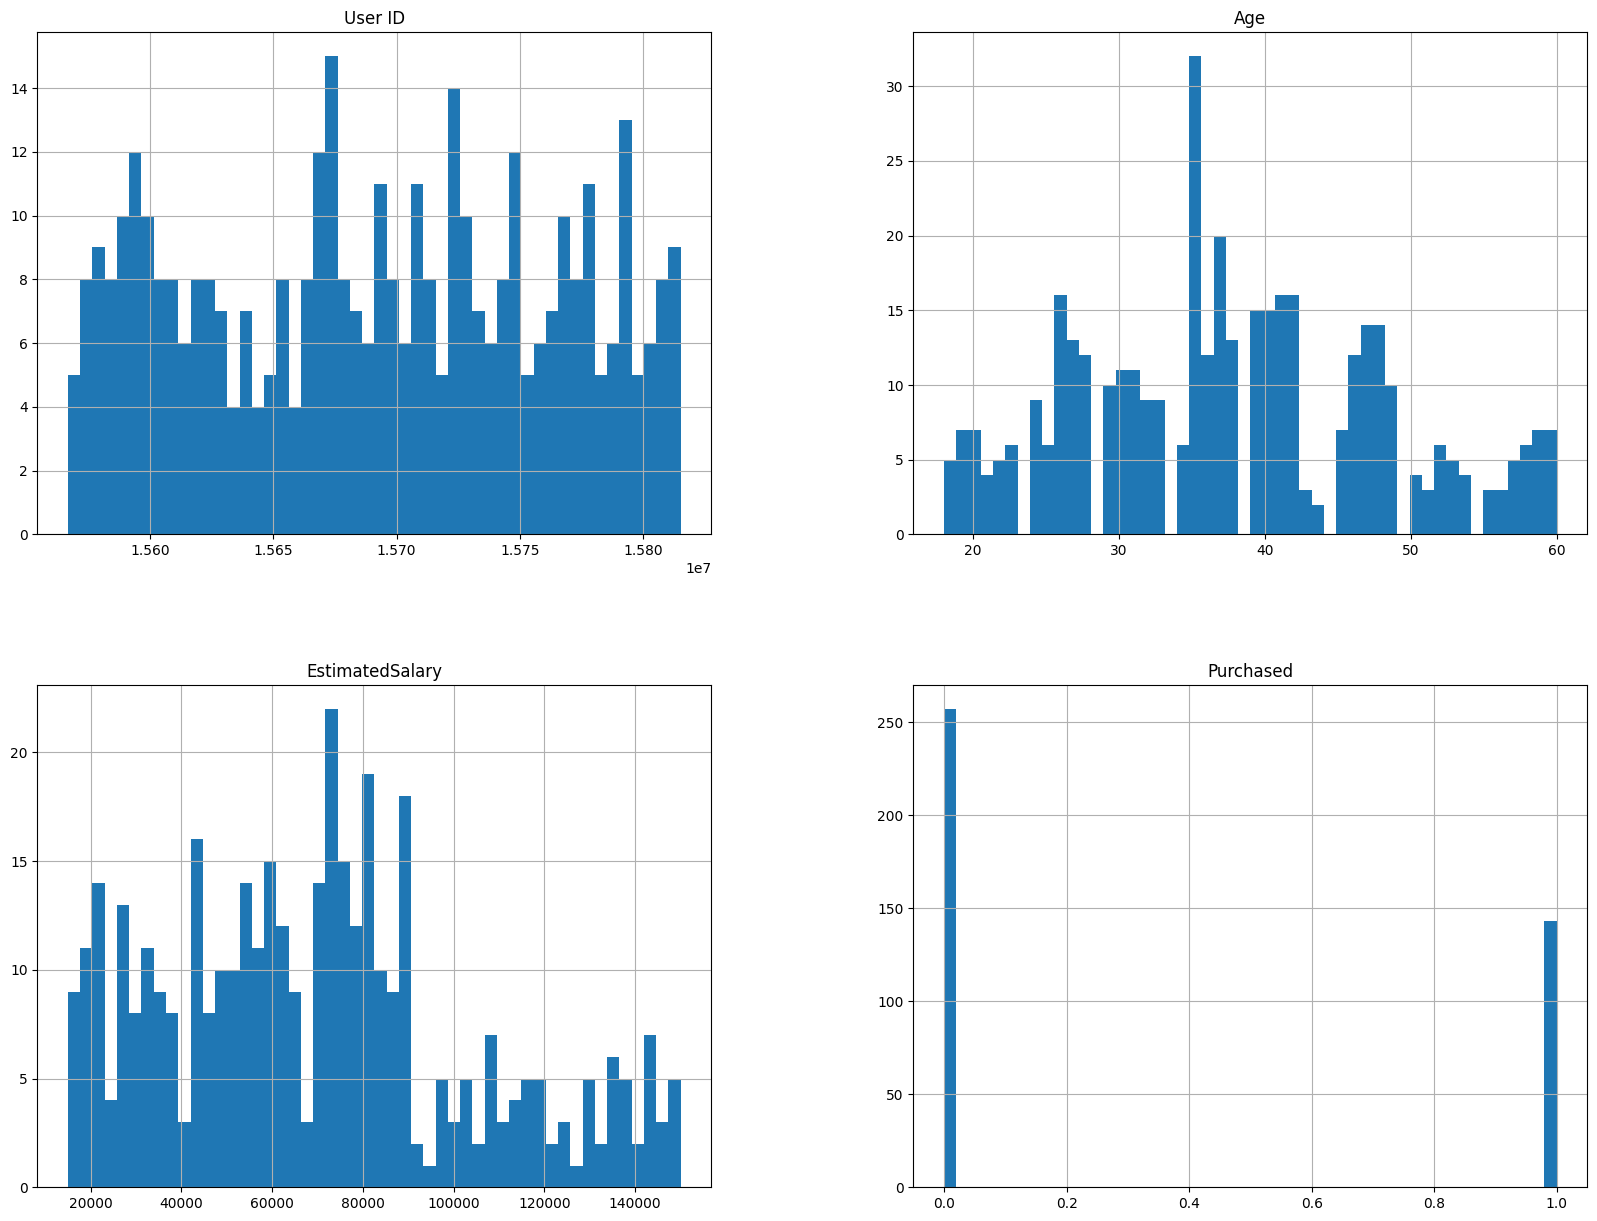

In [83]:
df_logistic.hist(bins=50,figsize=(20,15))
plt.show()

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

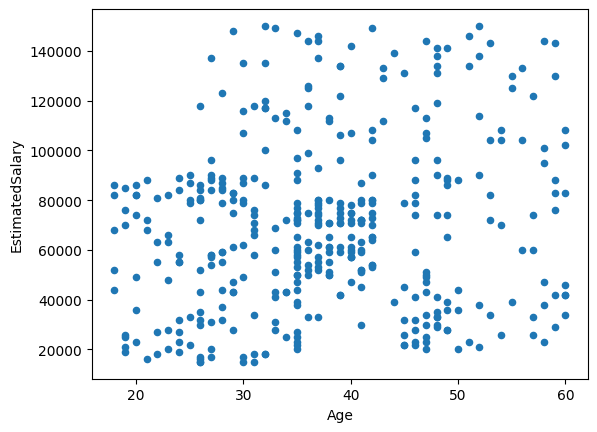

In [84]:
df_logistic.plot(kind="scatter" , x= "Age" , y="EstimatedSalary")

In [85]:
df_logistic['Gender'].replace('Male',1,inplace=True)
df_logistic['Gender'].replace('Female',0,inplace=True)

In [86]:
df_logistic['Gender'].unique()

array([1, 0])

In [87]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age', 'EstimatedSalary']
X_logistic = df_logistic[feature_cols] # Features 
y_logistic = df_logistic.Purchased # Target variable

In [88]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, y_logistic, test_size=0.20, random_state=16)

In [89]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train_logistic, y_train_logistic)

y_pred = logreg.predict(X_test_logistic)

In [90]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_logistic, y_pred)
cnf_matrix

array([[49,  5],
       [ 7, 19]])

Visualizing confusion matrix using a heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

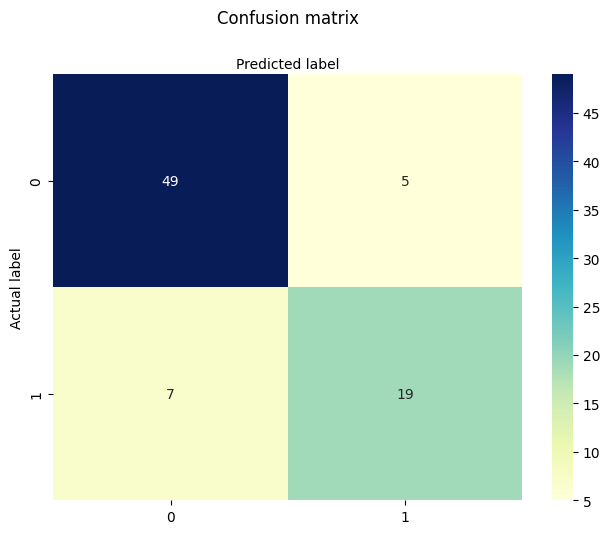

In [91]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Q3: SVM 

In [92]:
df_bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [93]:
df_bank.shape

(5000, 14)

In [94]:
df_bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [95]:
df_bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [96]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [97]:
df_bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Pick all 'Age', 'Experience', 'Income' as independent feature and CreditCard as dependent feature

In [98]:
temp_data  = df_bank[['Age', 'Experience', 'Income','CreditCard']]
df_bank =temp_data.drop_duplicates()

In [99]:
df_bank.head()

,Age,Experience,Income,CreditCard
0,25,1,49,0
1,45,19,34,0
2,39,15,11,0
3,35,9,100,0
4,35,8,45,1


In [100]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         4538 non-null   int64
 1   Experience  4538 non-null   int64
 2   Income      4538 non-null   int64
 3   CreditCard  4538 non-null   int64
dtypes: int64(4)
memory usage: 177.3 KB


store all features in x and store target Creditcard in Y

In [101]:
x_bank = df_bank[['Age', 'Experience', 'Income']]
y_bank = df_bank['CreditCard']

In [102]:
x_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4538 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         4538 non-null   int64
 1   Experience  4538 non-null   int64
 2   Income      4538 non-null   int64
dtypes: int64(3)
memory usage: 141.8 KB


Plot a 3D scatter plot using Matplotlib.

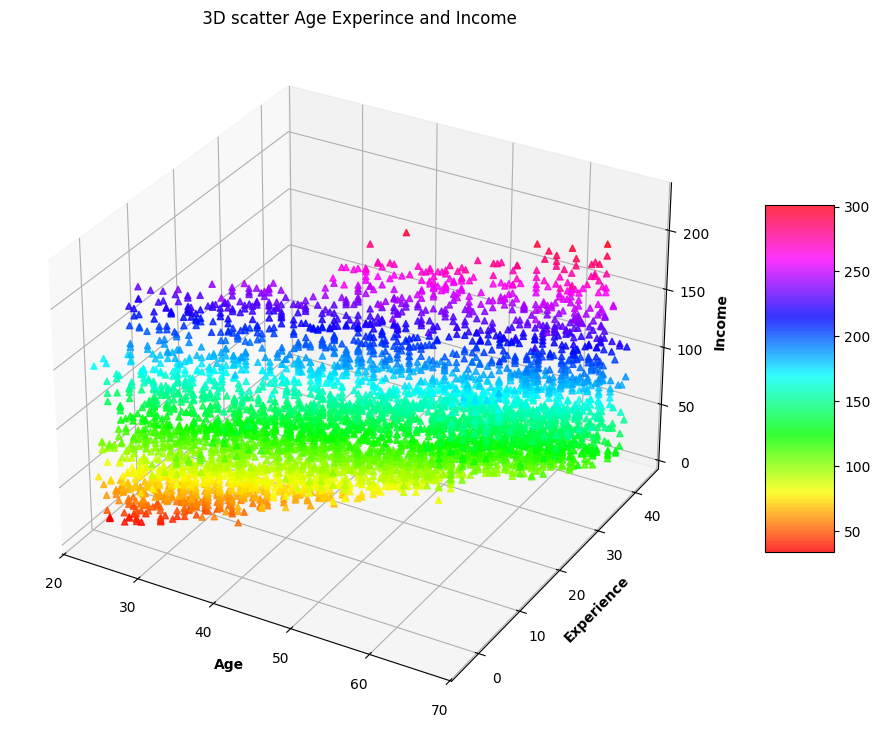

In [103]:
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
x1= df_bank['Age']
y1 = df_bank['Experience']
z1=df_bank['Income']
# Creating plot
sctt = ax.scatter3D(x1, y1, z1,
                    alpha = 0.8,
                    c = (x1 + y1 + z1), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title(" 3D scatter Age Experince and Income")
ax.set_xlabel('Age', fontweight ='bold') 
ax.set_ylabel('Experience', fontweight ='bold') 
ax.set_zlabel('Income', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

Plot scatter plot

<Axes: xlabel='Age', ylabel='Experience'>

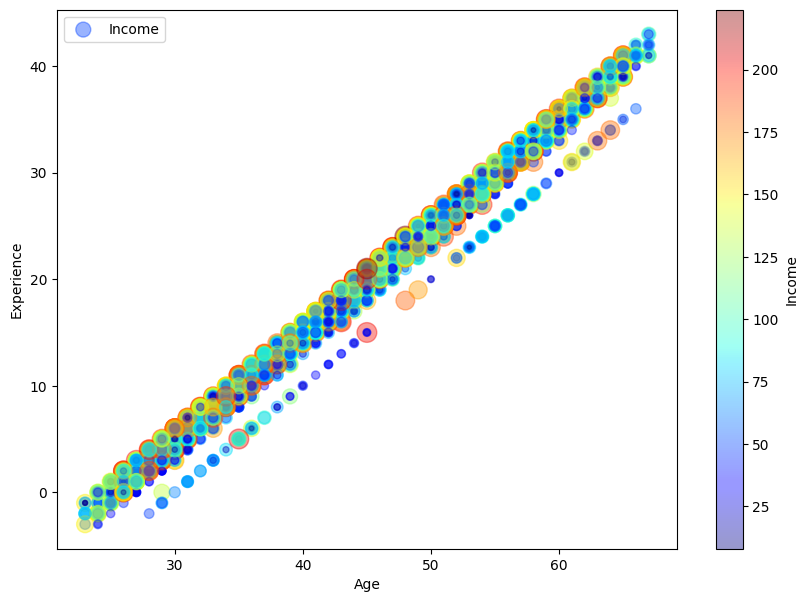

In [104]:
df_bank.plot(kind="scatter", x="Age", y="Experience", alpha=0.4,
                    s='Income', label="Income",
                     c="Income" , figsize=(10,7),
                     cmap=plt.get_cmap("jet"), colorbar=True,
                    )

Split the dataset into 80:20. (3 features and 1 target variable).

In [105]:
# split X and y into training and testing sets

x_train_bank, x_test_bank, y_train_bank, y_test_bank = train_test_split(x_bank, y_bank, test_size=0.20, random_state=43)

In [106]:
x_train_bank.shape

(3630, 3)

In [107]:
# import LinearSVC 
from sklearn.svm import LinearSVC

In [108]:
# model with regularization parameter 0.0001

In [109]:
model_dec_0001 = LinearSVC(verbose=0 , C=0.0001)
model_dec_0001.fit(x_train_bank, y_train_bank)


LinearSVC(C=0.0001)

check prediction for test data

In [110]:
predictions_dec_0001 = model_dec_0001.predict(x_test_bank)
predictions_dec_0001

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
model_dec_0001.score(x_test_bank,y_test_bank)

0.6828193832599119

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_bank, predictions_dec_0001)

array([[620,   0],
       [288,   0]])

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bank, predictions_dec_0001,zero_division=0))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       620
           1       0.00      0.00      0.00       288

    accuracy                           0.68       908
   macro avg       0.34      0.50      0.41       908
weighted avg       0.47      0.68      0.55       908



Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
    i. For each value of C Print the score on test data
    ii. Make the prediction on test data
    iii. Print confusion matrix and classification report

In [114]:
for x in {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}:
    X11_train, X11_test, y11_train, y11_test = train_test_split(x_bank, y_bank, test_size=0.20, random_state=42)
    mm = LinearSVC( C=x , max_iter=10000  )
    mm.fit(X11_train, y11_train)
    predict = mm.predict(X11_test)
    print("Score" )
    print(mm.score(X11_test,y11_test))
    print("Predicction")
    print(predict)
    print("Confusion matrix")
    print(confusion_matrix(y11_test, predict))
    print("Classification report")
    print(classification_report(y11_test, predict,zero_division=0))

Score
0.6927312775330396
Predicction
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Question 4 Decision Trees and Random Forest

#### Loading of iris dataset

In [115]:
irisData = datasets.load_iris()
iris = pd.DataFrame(irisData.data, columns=irisData.feature_names)
iris['species'] = [irisData.target_names[value] for value in irisData.target]
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Q4.1 Visualize the distribution of each feature and the class distribution.

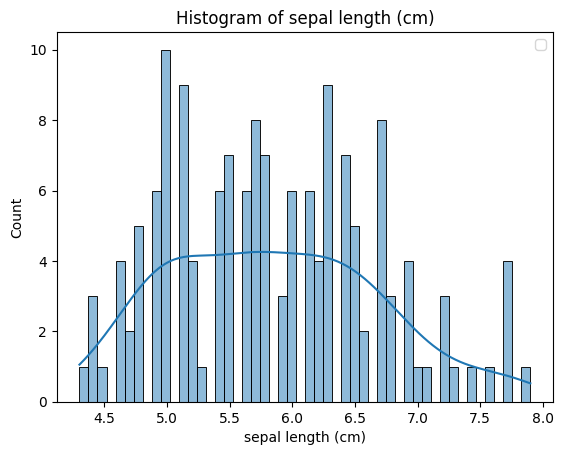

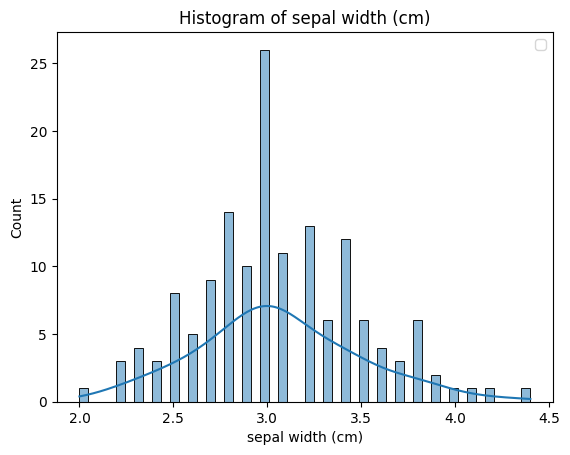

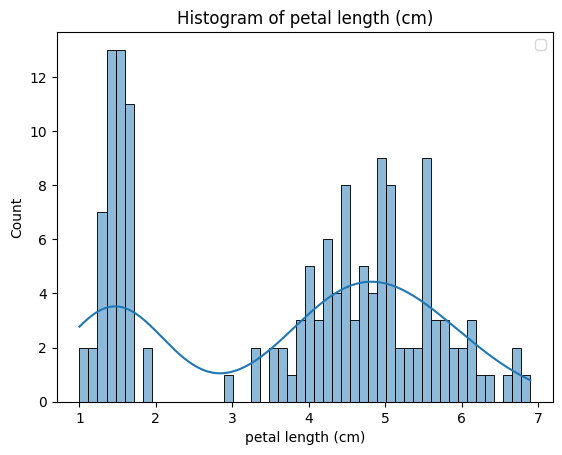

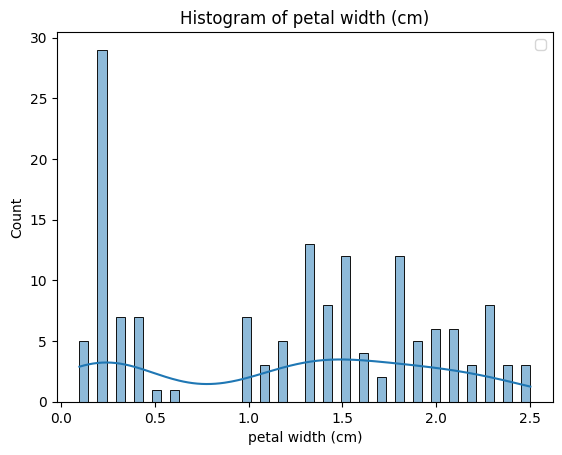

In [116]:


visualDFdata(data=iris)




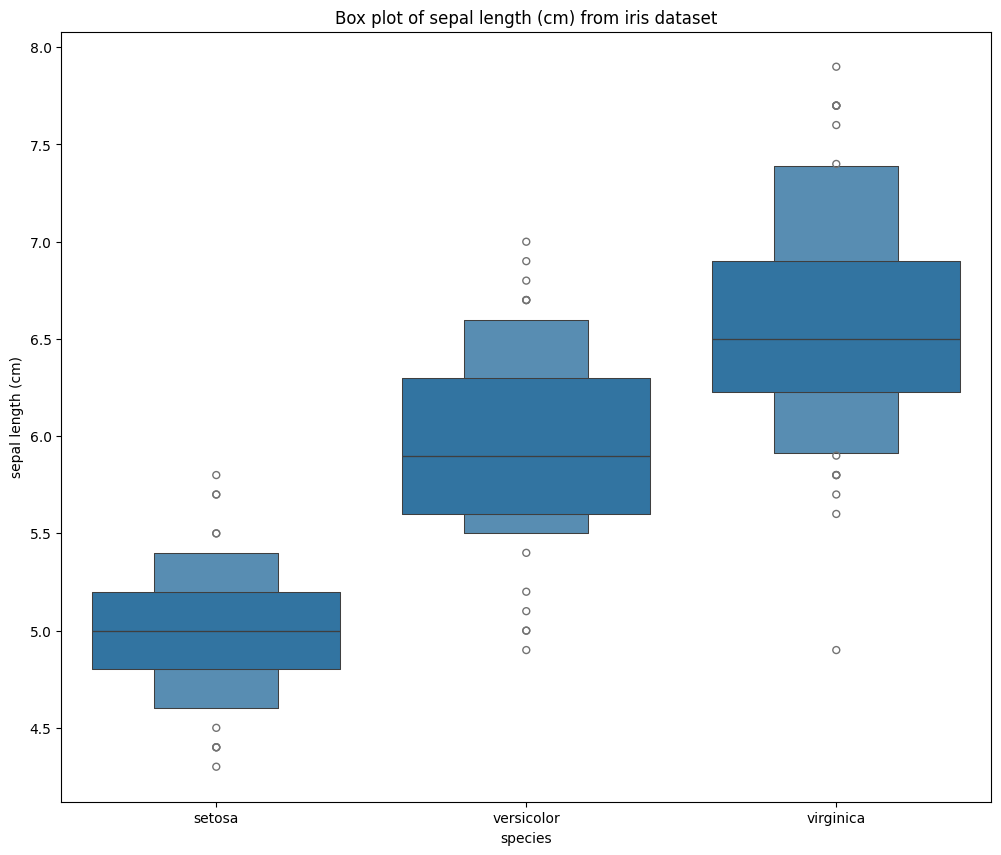

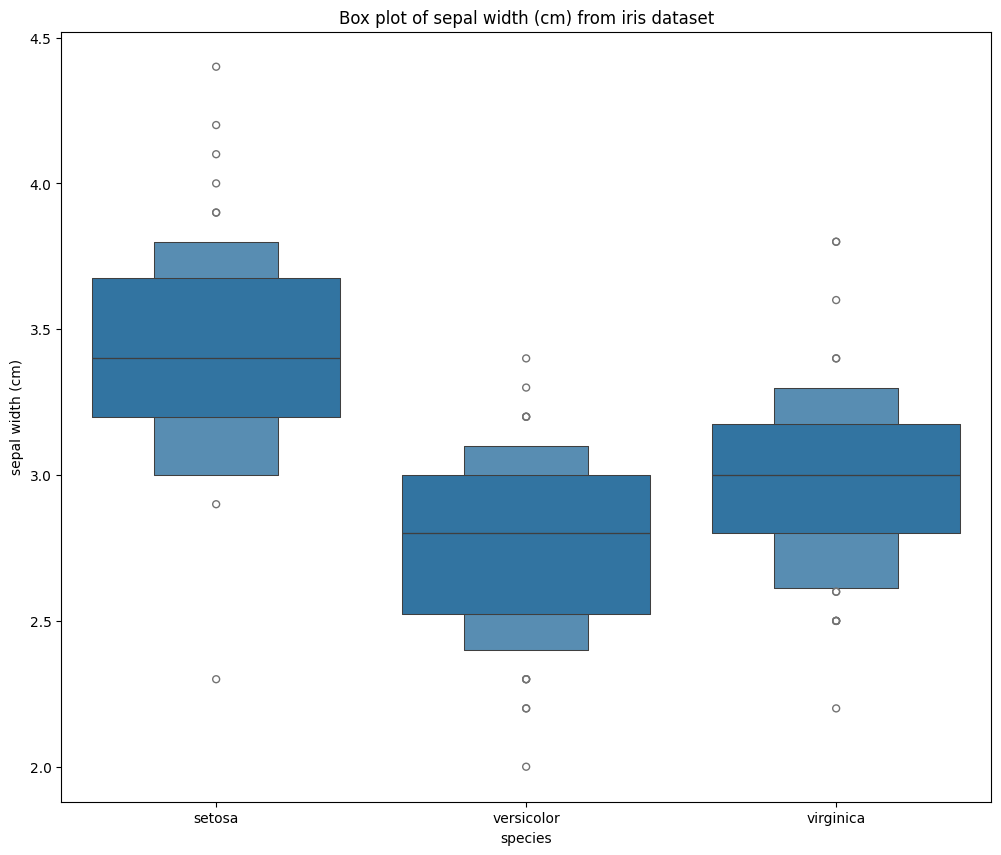

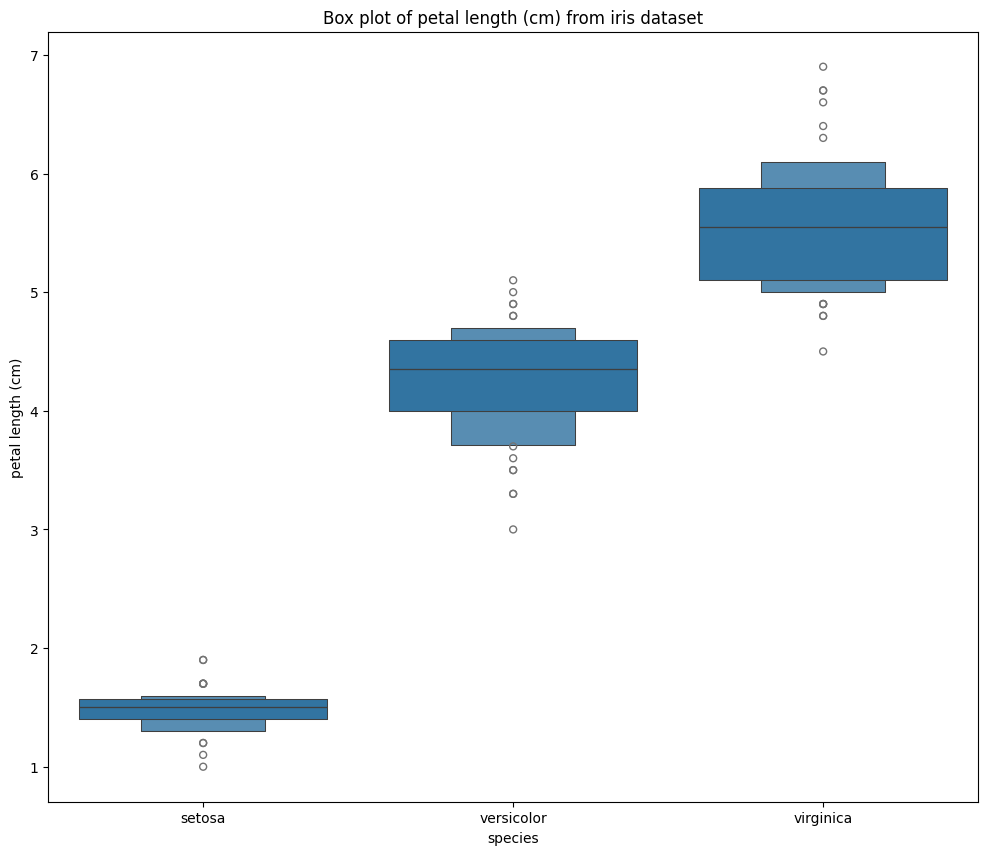

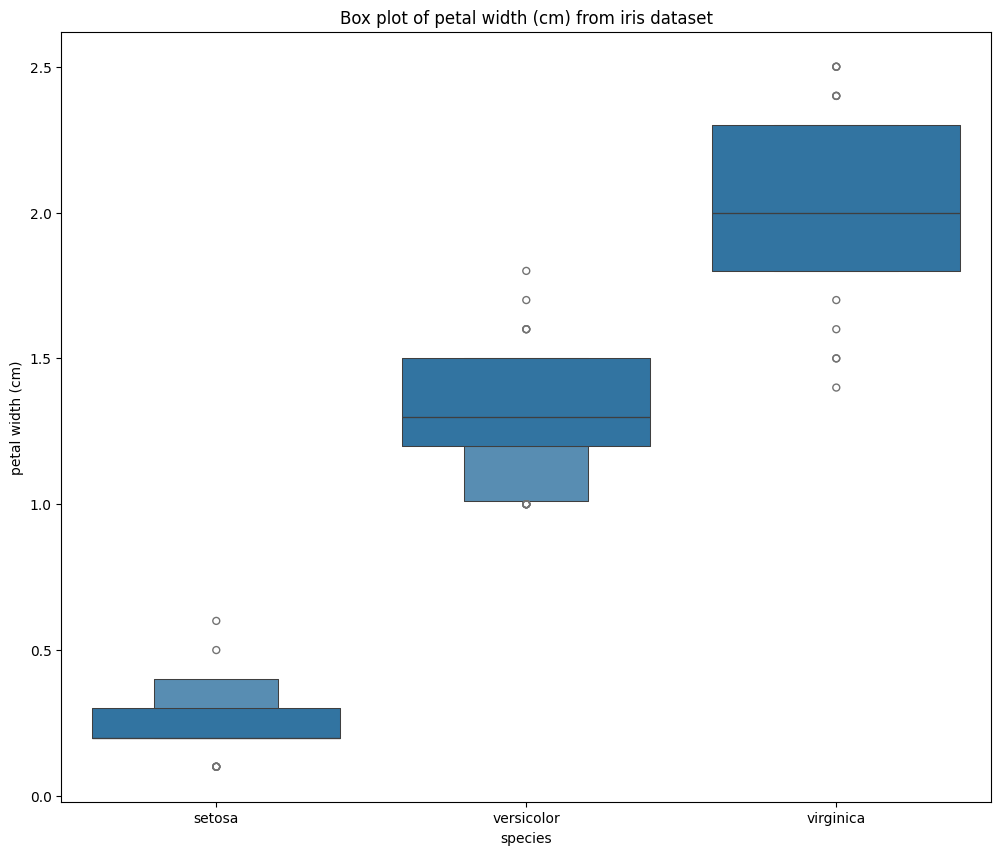

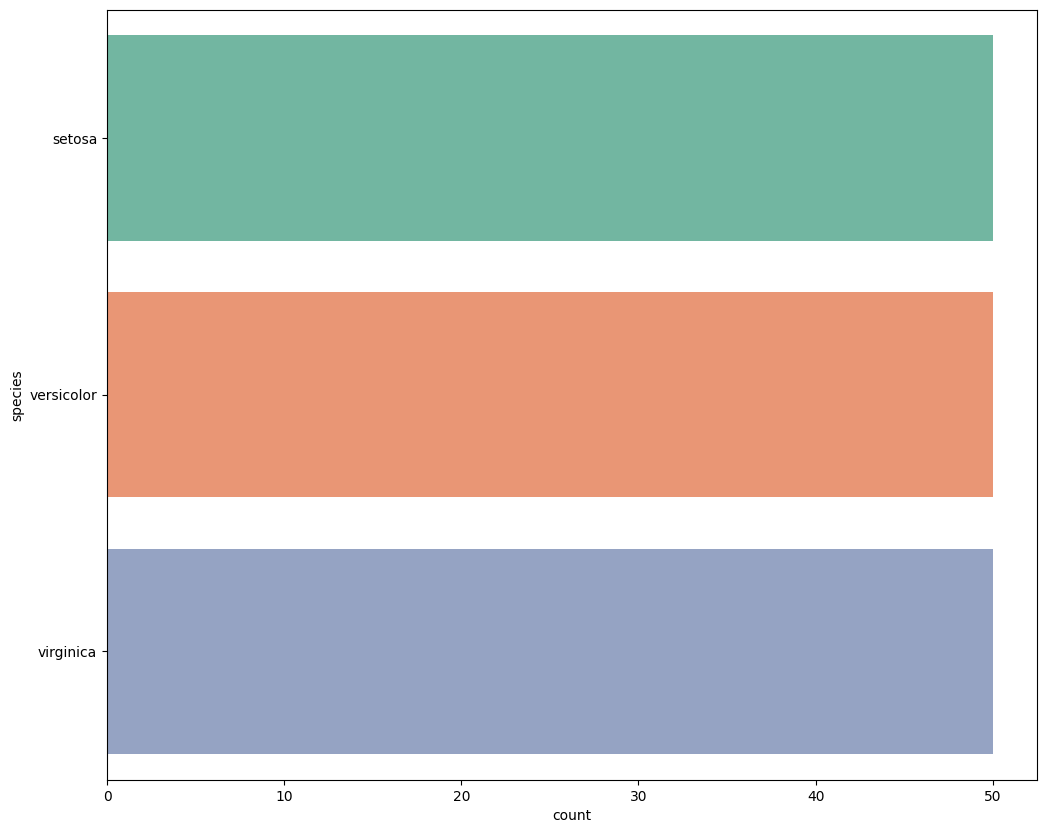

In [117]:
features = irisData.feature_names

for feature in features:
    plt.figure(figsize=(12,10))
    sns.boxenplot(iris,x='species',y=feature)
    plt.title(f'Box plot of {feature} from iris dataset')
    plt.show()

plt.figure(figsize=(12,10))
sns.countplot(iris['species'],palette="Set2")
plt.show()

### Q4.2 Encode the categorical target variable (species) into numerical values.

We are now using label encoder and create  a new column for species encoding

In [118]:
labelEncoder = LabelEncoder()
iris['species_encoding'] = labelEncoder.fit_transform(iris['species'])

iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoding
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


### Q4.3 Split the dataset into training and testing sets (use an appropriate ratio).

In [119]:
X = iris.loc[:,irisData.feature_names]
Y = iris['species_encoding']

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=40)



### Q4.4  Decision Tree Model

#### i Build a decision tree classifier using the training set.
#### ii Visualize the resulting decision tree.
#### iii Make predictions on the testing set and evaluate the model's performance using appropriate metrics (e.g., accuracy, confusion matrix).

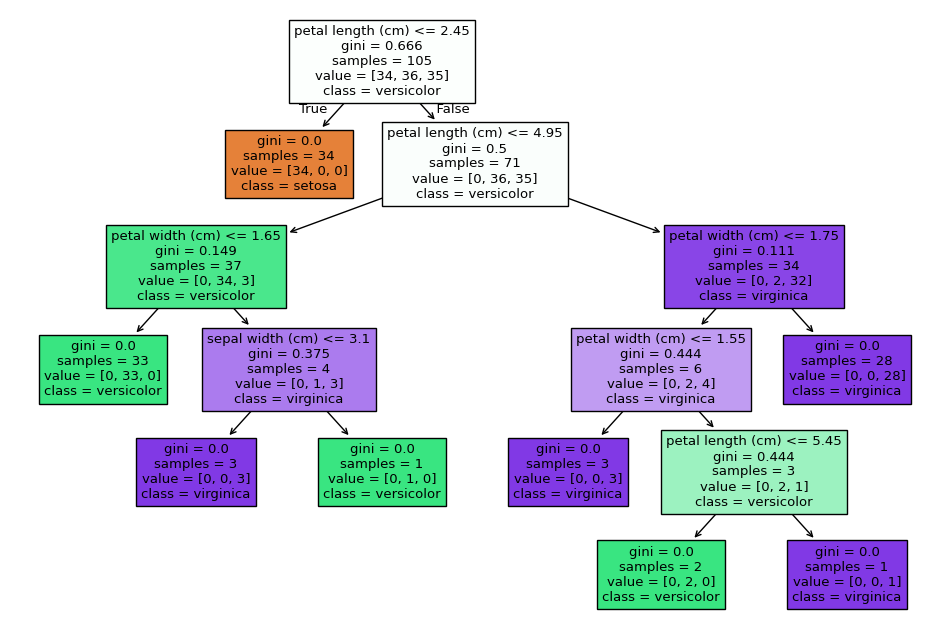




Accuracy: 1.00





Confusion Matrix:




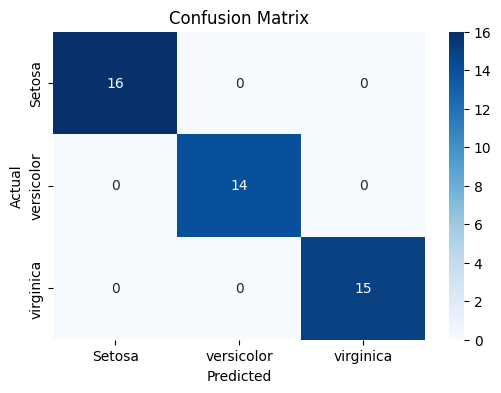



Classification Report:


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



ROC:




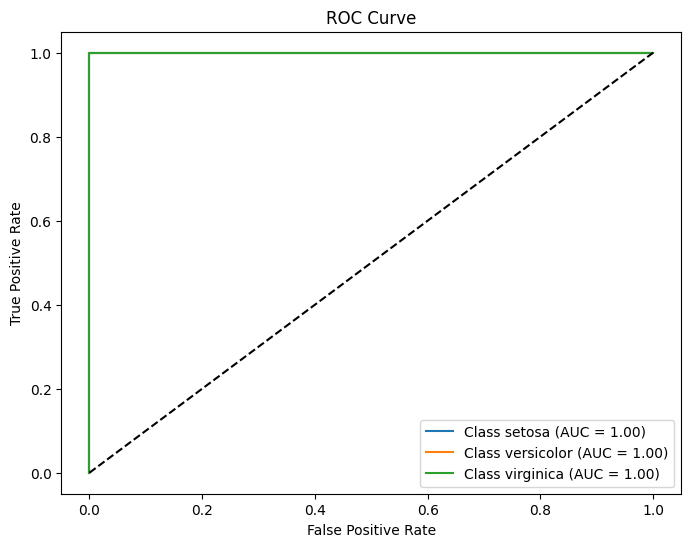



F1 Score:




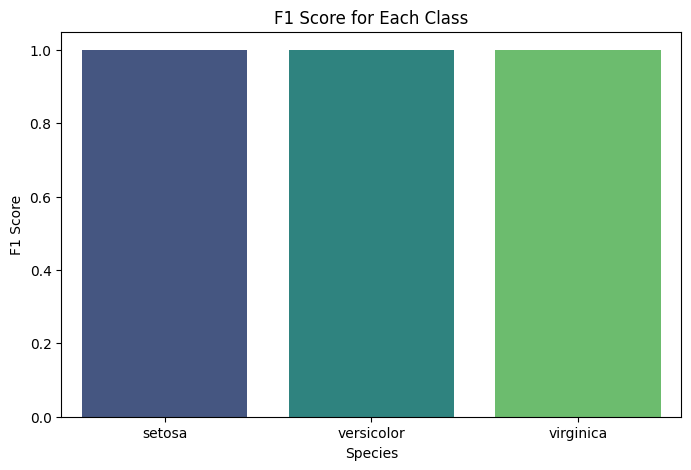



Precision & Recall:




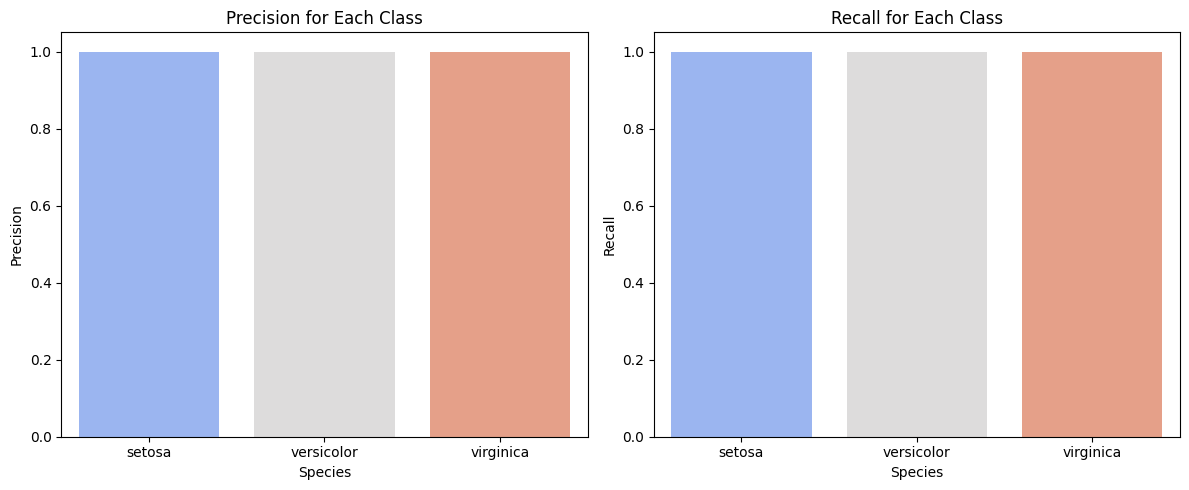

In [120]:

dt_cls = DecisionTreeClassifier(random_state=42)
dt_cls.fit(x_train, y_train)


y_pred = dt_cls.predict(x_test)
y_score = dt_cls.predict_proba(x_test)

plt.figure(figsize=(12, 8))
plot_tree(dt_cls, feature_names=irisData.feature_names, class_names=irisData.target_names, filled=True)
plt.show()


accuracy = accuracy_score(y_test, y_pred)
confMatrix = confusion_matrix(y_test, y_pred)
classReport = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)


print(f'\n\n\nAccuracy: {accuracy:.2f}\n\n\n')

print("\n\nConfusion Matrix:\n\n")
plt.figure(figsize=(6,4))
sns.heatmap(confMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Setosa", "versicolor", "virginica"], yticklabels=["Setosa", "versicolor", "virginica"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\n\nClassification Report:\n\n")
print(classReport)


print("\n\nROC:\n\n")
plt.figure(figsize=(8, 6))
for i in range(len(irisData.target_names)):
    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {irisData.target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("\n\nF1 Score:\n\n")
plt.figure(figsize=(8, 5))
sns.barplot(x=irisData.target_names, y=f1, palette='viridis')
plt.xlabel('Species')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.show()

print("\n\nPrecision & Recall:\n\n")
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=irisData.target_names, y=precision, palette='coolwarm', ax=ax[0])
ax[0].set_xlabel('Species')
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision for Each Class')

sns.barplot(x=irisData.target_names, y=recall, palette='coolwarm', ax=ax[1])
ax[1].set_xlabel('Species')
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall for Each Class')

plt.tight_layout()
plt.show()

### Q4.4 Random Forest Model
#### i Build a random forest classifier using the training set.
#### ii Tune the hyperparameters (e.g., number of trees, maximum depth) if necessary.
#### iii Make predictions on the testing set and evaluate the model's performance using appropriate metrics and compare it with the decision tree model.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=301; total time=   0.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=401; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=301; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=301; total time=   0.3s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=401; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=301; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=301; total time=   0.4s
[CV] END bootstrap=False, max_depth=40, min_samples_leaf=1, min_samples_split=10, n_estimators=401; total

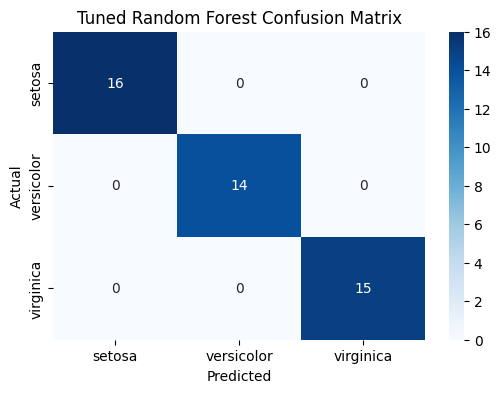

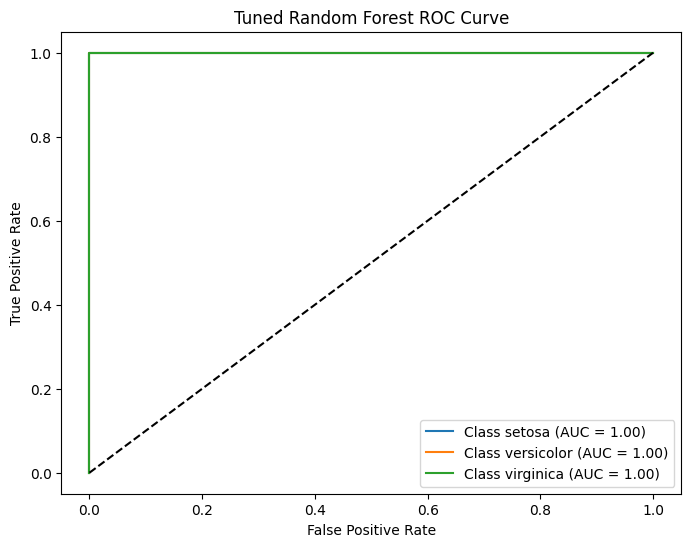

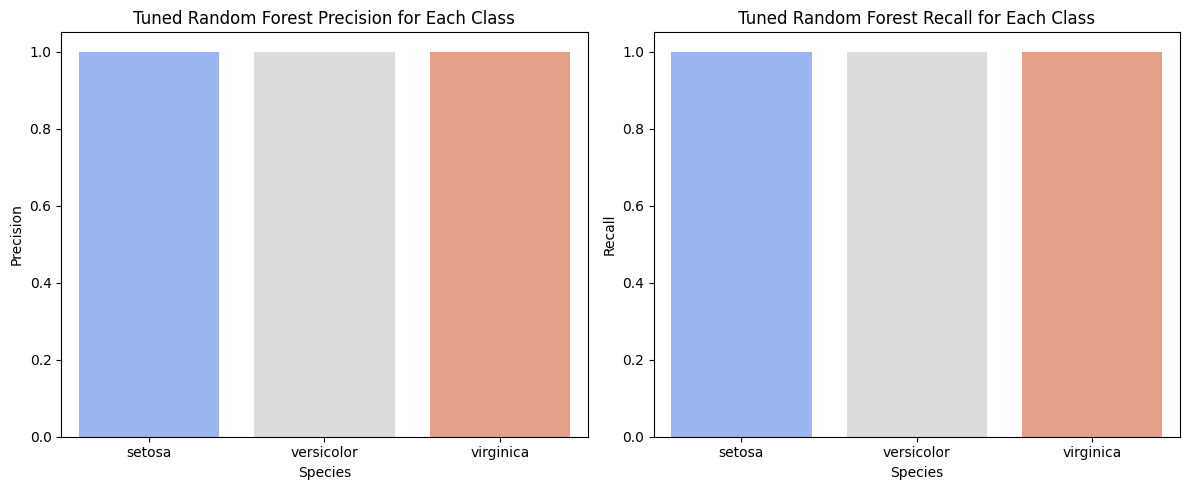

In [121]:

rf_clf = RandomForestClassifier(n_estimators=101, random_state=42)
rf_clf.fit(x_train, y_train)

param_dist = {
    'n_estimators': [51, 101,151, 201, 301, 401],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10,20,50],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=20, cv=5, verbose=2, random_state=42, n_jobs=-4)
random_search.fit(x_train, y_train)

print(f'Best Parameters: {random_search.best_params_}')
best_rf_clf = random_search.best_estimator_
best_rf_clf.fit(x_train, y_train)

y_pred_rf = best_rf_clf.predict(x_test)
y_score_rf = best_rf_clf.predict_proba(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
confMatrix_rf = confusion_matrix(y_test, y_pred_rf)
classReport_rf = classification_report(y_test, y_pred_rf)

f1_rf = f1_score(y_test, y_pred_rf, average=None)
precision_rf = precision_score(y_test, y_pred_rf, average=None)
recall_rf = recall_score(y_test, y_pred_rf, average=None)

print(f'Tuned Random Forest Accuracy: {accuracy_rf:.2f}')
print('Tuned Random Forest Confusion Matrix:\n', confMatrix_rf)
print('Tuned Random Forest Classification Report:\n', classReport_rf)

# Plot confusion matrix for Tuned Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confMatrix_rf, annot=True, cmap="Blues", fmt='d', xticklabels=irisData.target_names, yticklabels=irisData.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()


plt.figure(figsize=(8, 6))
for i in range(len(irisData.target_names)):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {irisData.target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Random Forest ROC Curve')
plt.legend()
plt.show()


fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=irisData.target_names, y=precision_rf, palette='coolwarm', ax=ax[0])
ax[0].set_xlabel('Species')
ax[0].set_ylabel('Precision')
ax[0].set_title('Tuned Random Forest Precision for Each Class')

sns.barplot(x=irisData.target_names, y=recall_rf, palette='coolwarm', ax=ax[1])
ax[1].set_xlabel('Species')
ax[1].set_ylabel('Recall')
ax[1].set_title('Tuned Random Forest Recall for Each Class')

plt.tight_layout()
plt.show()